In [1]:
# import sagemaker
# role = 'arn:aws:iam::349927747905:role/odanori-sagemaker'

In [6]:
# bucket_name = 'odanorilearning/minpaku'
# train_file_name = 'submissin.csv'
# s3_data_path = 's3://{}/{}'.format(bucket_name, train_file_name)

In [7]:
# !aws s3 cp {s3_data_path} ../minpaku

fatal error: An error occurred (404) when calling the HeadObject operation: Key "minpaku/submissin.csv" does not exist


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

In [2]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

In [315]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')
station = pd.read_csv('station_list.csv')

訓練データ
- name	施設名称	Downtown next to Koji-Machi
- host_id	施設の提供者の識別子（乱数化済）	181893395
- neighbourhood	所在地（東京都の23の特別区のいずれか）	Shinjuku Ku
- latitude	緯度	3568185
- longitude	経度	139.68077
- room_type	部屋の形式 (Entire home/apt|Private room|Shared room|Hotel room)	Entire home/apt
- minimum_nights	最短宿泊日数	1
- number_of_reviews	評価件数	523
- last_review	最終評価日	2020-02-03
- reviews_per_month	月当たりの評価件数	1.67
- availability_365	年間の宿泊可能日数	288
- y	1泊あたりの宿泊料金	9923

駅の緯度経度データ
- station_name	駅名	東京
- longitude	経度	139.766103
- latitude	緯度	35.681391

In [4]:
train.shape, test.shape, station.shape

((9990, 13), (4996, 12), (746, 3))

In [5]:
train.head()

id                                               name    host_id  \
0   1  KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...  242899459   
1   2                  Downtown Tokyo Iriya next to Ueno  308879948   
2   3        Japan Style,Private,Affordable,4min to Sta.  300877823   
3   4    4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi  236935461   
4   5      LICENSED SHINJUKU HOUSE: Heart of the action!  243408889   

   neighbourhood  latitude  longitude        room_type  minimum_nights  \
0        Koto Ku  35.68185  139.80310  Entire home/apt               1   
1       Taito Ku  35.72063  139.78536  Entire home/apt               6   
2  Katsushika Ku  35.74723  139.82349  Entire home/apt               1   
3     Shibuya Ku  35.68456  139.68077  Entire home/apt               1   
4    Shinjuku Ku  35.69840  139.70467  Entire home/apt               1   

   number_of_reviews last_review  reviews_per_month  availability_365       y  
0                 55  2020-04-25               2.21               173   12008  
1                 72  2020-03-25               2.11                 9    6667  
2                 18  2020-03-23               3.46               288    9923  
3                  2  2020-04-02               1.76                87    8109  
4                 86  2020-01-30               2.00               156  100390

In [6]:
test.head()

id                                               name    host_id  \
0   1    5-minute walk from Akasaka Sta, Superior double  184730720   
1   2       7 min Sta.-Center of IKEBUKURO Cozy Room#503   20993205   
2   3  Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min  322521715   
3   4                 Komagome Station 2 minutes on foot  234477095   
4   5    Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara  145453833   

  neighbourhood  latitude  longitude        room_type  minimum_nights  \
0     Minato Ku  35.67131  139.73285     Private room               1   
1    Toshima Ku  35.73014  139.71739  Entire home/apt               2   
2   Setagaya Ku  35.66193  139.66540  Entire home/apt               1   
3    Toshima Ku  35.73603  139.74794  Entire home/apt               1   
4      Taito Ku  35.72126  139.78320  Entire home/apt              30   

   number_of_reviews last_review  reviews_per_month  availability_365  
0                  0         NaN                NaN               183  
1                 21  2020-04-16               1.94               337  
2                 14  2020-02-12               0.82               240  
3                 16  2020-02-17               1.19                 0  
4                  2  2019-07-21               0.19               164

In [7]:
station.head()

station_name   longitude   latitude
0           白丸  139.114861  35.811735
1           古里  139.152102  35.816247
2           川井  139.164290  35.813697
3           御嶽  139.182589  35.801468
4           沢井  139.193324  35.805940

In [8]:
train.isnull().sum()

id                      0
name                    0
host_id                 0
neighbourhood           0
latitude                0
longitude               0
room_type               0
minimum_nights          0
number_of_reviews       0
last_review          1699
reviews_per_month    1699
availability_365        0
y                       0
dtype: int64

In [9]:
test.isnull().sum()

id                     0
name                   0
host_id                0
neighbourhood          0
latitude               0
longitude              0
room_type              0
minimum_nights         0
number_of_reviews      0
last_review          832
reviews_per_month    832
availability_365       0
dtype: int64

In [10]:
station.isnull().sum()

station_name    0
longitude       0
latitude        0
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9990 non-null   int64  
 1   name               9990 non-null   object 
 2   host_id            9990 non-null   int64  
 3   neighbourhood      9990 non-null   object 
 4   latitude           9990 non-null   float64
 5   longitude          9990 non-null   float64
 6   room_type          9990 non-null   object 
 7   minimum_nights     9990 non-null   int64  
 8   number_of_reviews  9990 non-null   int64  
 9   last_review        8291 non-null   object 
 10  reviews_per_month  8291 non-null   float64
 11  availability_365   9990 non-null   int64  
 12  y                  9990 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 1014.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4996 non-null   int64  
 1   name               4996 non-null   object 
 2   host_id            4996 non-null   int64  
 3   neighbourhood      4996 non-null   object 
 4   latitude           4996 non-null   float64
 5   longitude          4996 non-null   float64
 6   room_type          4996 non-null   object 
 7   minimum_nights     4996 non-null   int64  
 8   number_of_reviews  4996 non-null   int64  
 9   last_review        4164 non-null   object 
 10  reviews_per_month  4164 non-null   float64
 11  availability_365   4996 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 468.5+ KB


In [316]:
#欠損値レコードの確認
#すべて同一レコードかどうか
trnul = train.query('last_review != last_review & reviews_per_month != reviews_per_month')
tsnul = test.query('last_review != last_review & reviews_per_month != reviews_per_month')

In [14]:
len(trnul), len(tsnul)

(1699, 832)

In [15]:
len(train.query('number_of_reviews == 0')), len(test.query('number_of_reviews == 0'))

(1699, 832)

- 欠損データがあるカラムはlast_reviewとreviews_per_monthの二つ
- train,test両方とも、last_reviewとreviews_per_monthが両方とも欠損しているレコード
- number_of_reviewsが0→評価件数がないデータが欠損している

- まずは欠損値を「データそのものがない」という仮定のもと0で補完

In [16]:
#欠損値の補完、ひと月当たりのレビューデータなし、という仮定で0を補完
train['reviews_per_month'].fillna(0, inplace=True)
test['reviews_per_month'].fillna(0, inplace=True)

In [317]:
#欠損値の補完、最後に閲覧された月のデータなし、という仮定で仮の日程'2100-01-01'で補完
train['last_review'].fillna('2100-01-01', inplace=True)
test['last_review'].fillna('2100-01-01', inplace=True)

In [18]:
train.isnull().sum()

id                   0
name                 0
host_id              0
neighbourhood        0
latitude             0
longitude            0
room_type            0
minimum_nights       0
number_of_reviews    0
last_review          0
reviews_per_month    0
availability_365     0
y                    0
dtype: int64

In [19]:
test.isnull().sum()

id                   0
name                 0
host_id              0
neighbourhood        0
latitude             0
longitude            0
room_type            0
minimum_nights       0
number_of_reviews    0
last_review          0
reviews_per_month    0
availability_365     0
dtype: int64

In [318]:
#日付データを文字列から日付型へ変換
from datetime import datetime as dt
train['last_review_D'] = train['last_review'].apply(lambda x: dt.strptime(x, '%Y-%m-%d') if x == x and x != 0 else 0)
test['last_review_D'] = test['last_review'].apply(lambda x: dt.strptime(x, '%Y-%m-%d') if x == x and x != 0 else 0)


In [21]:
train.head()

id                                               name    host_id  \
0   1  KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...  242899459   
1   2                  Downtown Tokyo Iriya next to Ueno  308879948   
2   3        Japan Style,Private,Affordable,4min to Sta.  300877823   
3   4    4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi  236935461   
4   5      LICENSED SHINJUKU HOUSE: Heart of the action!  243408889   

   neighbourhood  latitude  longitude        room_type  minimum_nights  \
0        Koto Ku  35.68185  139.80310  Entire home/apt               1   
1       Taito Ku  35.72063  139.78536  Entire home/apt               6   
2  Katsushika Ku  35.74723  139.82349  Entire home/apt               1   
3     Shibuya Ku  35.68456  139.68077  Entire home/apt               1   
4    Shinjuku Ku  35.69840  139.70467  Entire home/apt               1   

   number_of_reviews last_review  reviews_per_month  availability_365       y  \
0                 55  2020-04-25               2.21               173   12008   
1                 72  2020-03-25               2.11                 9    6667   
2                 18  2020-03-23               3.46               288    9923   
3                  2  2020-04-02               1.76                87    8109   
4                 86  2020-01-30               2.00               156  100390   

  last_review_D  
0    2020-04-25  
1    2020-03-25  
2    2020-03-23  
3    2020-04-02  
4    2020-01-30

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 9990 non-null   int64         
 1   name               9990 non-null   object        
 2   host_id            9990 non-null   int64         
 3   neighbourhood      9990 non-null   object        
 4   latitude           9990 non-null   float64       
 5   longitude          9990 non-null   float64       
 6   room_type          9990 non-null   object        
 7   minimum_nights     9990 non-null   int64         
 8   number_of_reviews  9990 non-null   int64         
 9   last_review        9990 non-null   object        
 10  reviews_per_month  9990 non-null   float64       
 11  availability_365   9990 non-null   int64         
 12  y                  9990 non-null   int64         
 13  last_review_D      9990 non-null   datetime64[ns]
dtypes: datet

In [23]:
test.head()

id                                               name    host_id  \
0   1    5-minute walk from Akasaka Sta, Superior double  184730720   
1   2       7 min Sta.-Center of IKEBUKURO Cozy Room#503   20993205   
2   3  Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min  322521715   
3   4                 Komagome Station 2 minutes on foot  234477095   
4   5    Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara  145453833   

  neighbourhood  latitude  longitude        room_type  minimum_nights  \
0     Minato Ku  35.67131  139.73285     Private room               1   
1    Toshima Ku  35.73014  139.71739  Entire home/apt               2   
2   Setagaya Ku  35.66193  139.66540  Entire home/apt               1   
3    Toshima Ku  35.73603  139.74794  Entire home/apt               1   
4      Taito Ku  35.72126  139.78320  Entire home/apt              30   

   number_of_reviews last_review  reviews_per_month  availability_365  \
0                  0  2100-01-01               0.00               183   
1                 21  2020-04-16               1.94               337   
2                 14  2020-02-12               0.82               240   
3                 16  2020-02-17               1.19                 0   
4                  2  2019-07-21               0.19               164   

  last_review_D  
0    2100-01-01  
1    2020-04-16  
2    2020-02-12  
3    2020-02-17  
4    2019-07-21

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4996 non-null   int64         
 1   name               4996 non-null   object        
 2   host_id            4996 non-null   int64         
 3   neighbourhood      4996 non-null   object        
 4   latitude           4996 non-null   float64       
 5   longitude          4996 non-null   float64       
 6   room_type          4996 non-null   object        
 7   minimum_nights     4996 non-null   int64         
 8   number_of_reviews  4996 non-null   int64         
 9   last_review        4996 non-null   object        
 10  reviews_per_month  4996 non-null   float64       
 11  availability_365   4996 non-null   int64         
 12  last_review_D      4996 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory us

仮説
- last_reviewとreviews_per_monthの双方のデータが欠損している物件が、そもそもなぜ欠損しているか
- number_of_reviews=0のもの
- 1)最近新しく登録されたもの
- 2)登録されてから何らかの事情で見られていないもの

In [25]:
#idとhost_idは元の情報が氏名や団体名の可能性があり、有用度は低いのでと仮定
#データを他テーブルへ保存
train_ids = train[['id', 'host_id']]
train.drop(['id', 'host_id'], axis=1, inplace=True)

In [26]:
train.head()

name  neighbourhood  latitude  \
0  KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...        Koto Ku  35.68185   
1                  Downtown Tokyo Iriya next to Ueno       Taito Ku  35.72063   
2        Japan Style,Private,Affordable,4min to Sta.  Katsushika Ku  35.74723   
3    4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi     Shibuya Ku  35.68456   
4      LICENSED SHINJUKU HOUSE: Heart of the action!    Shinjuku Ku  35.69840   

   longitude        room_type  minimum_nights  number_of_reviews last_review  \
0  139.80310  Entire home/apt               1                 55  2020-04-25   
1  139.78536  Entire home/apt               6                 72  2020-03-25   
2  139.82349  Entire home/apt               1                 18  2020-03-23   
3  139.68077  Entire home/apt               1                  2  2020-04-02   
4  139.70467  Entire home/apt               1                 86  2020-01-30   

   reviews_per_month  availability_365       y last_review_D  
0               2.21               173   12008    2020-04-25  
1               2.11                 9    6667    2020-03-25  
2               3.46               288    9923    2020-03-23  
3               1.76                87    8109    2020-04-02  
4               2.00               156  100390    2020-01-30

In [27]:
train.shape

(9990, 12)

In [28]:
train_ids

id    host_id
0        1  242899459
1        2  308879948
2        3  300877823
3        4  236935461
4        5  243408889
...    ...        ...
9985  9986   59104733
9986  9987  131595566
9987  9988  147026065
9988  9989  316273494
9989  9990   35519960

[9990 rows x 2 columns]

In [29]:
#idとhost_idは元の情報が氏名や団体名の可能性があり、有用度は低いのでと仮定
#データを他テーブルへ保存
test_ids = test[['id', 'host_id']]
test.drop(['id', 'host_id'], axis=1, inplace=True)

In [30]:
test.head()

name neighbourhood  latitude  \
0    5-minute walk from Akasaka Sta, Superior double     Minato Ku  35.67131   
1       7 min Sta.-Center of IKEBUKURO Cozy Room#503    Toshima Ku  35.73014   
2  Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min   Setagaya Ku  35.66193   
3                 Komagome Station 2 minutes on foot    Toshima Ku  35.73603   
4    Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara      Taito Ku  35.72126   

   longitude        room_type  minimum_nights  number_of_reviews last_review  \
0  139.73285     Private room               1                  0  2100-01-01   
1  139.71739  Entire home/apt               2                 21  2020-04-16   
2  139.66540  Entire home/apt               1                 14  2020-02-12   
3  139.74794  Entire home/apt               1                 16  2020-02-17   
4  139.78320  Entire home/apt              30                  2  2019-07-21   

   reviews_per_month  availability_365 last_review_D  
0               0.00               183    2100-01-01  
1               1.94               337    2020-04-16  
2               0.82               240    2020-02-12  
3               1.19                 0    2020-02-17  
4               0.19               164    2019-07-21

In [31]:
test.shape

(4996, 11)

In [32]:
test_ids

id    host_id
0        1  184730720
1        2   20993205
2        3  322521715
3        4  234477095
4        5  145453833
...    ...        ...
4991  4992  166712541
4992  4993   58261300
4993  4994  243229864
4994  4995   50190468
4995  4996   50788113

[4996 rows x 2 columns]

In [33]:
# #目的変数yの分離
# y_train = train.pop('y')

In [34]:
# y_train

In [35]:
train.shape

(9990, 12)

In [36]:
train.describe()

latitude    longitude  minimum_nights  number_of_reviews  \
count  9990.000000  9990.000000     9990.000000        9990.000000   
mean     35.699999   139.742668        3.331331          25.943143   
std       0.040132     0.054896        8.504451          40.586283   
min      35.540990   139.575070        1.000000           0.000000   
25%      35.687173   139.702483        1.000000           2.000000   
50%      35.703460   139.732830        1.000000          11.000000   
75%      35.725695   139.785420        2.000000          33.000000   
max      35.815950   139.911970      365.000000         529.000000   

       reviews_per_month  availability_365             y  
count        9990.000000       9990.000000  9.990000e+03  
mean            1.410986        157.202102  2.510464e+04  
std             1.428561        115.780646  6.704985e+04  
min             0.000000          0.000000  9.210000e+02  
25%             0.280000         63.000000  6.960750e+03  
50%             1.120000        154.000000  1.189250e+04  
75%             2.220000        248.000000  2.008500e+04  
max            43.600000        365.000000  1.000103e+06

In [37]:
test.describe()

latitude    longitude  minimum_nights  number_of_reviews  \
count  4996.000000  4996.000000     4996.000000        4996.000000   
mean     35.698639   139.739712        3.204964          28.012610   
std       0.039766     0.055474       10.347555          41.047564   
min      35.540760   139.592570        1.000000           0.000000   
25%      35.687880   139.700915        1.000000           2.000000   
50%      35.702720   139.725515        1.000000          13.000000   
75%      35.723850   139.786620        2.000000          36.000000   
max      35.797070   139.905810      365.000000         407.000000   

       reviews_per_month  availability_365  
count        4996.000000       4996.000000  
mean            1.434197        153.018415  
std             1.355913        115.443609  
min             0.000000          0.000000  
25%             0.310000         62.000000  
50%             1.230000        141.000000  
75%             2.210000        246.000000  
max            19.700000        365.000000

- minimum_nightsにある365は、最短宿泊日数が1だと365連泊となる。これは「住んでいる」のではないかと仮定
- レビューが極端に多いのは、人気がある可能性。人気の要因は駅からの距離や値段などがないかを検討

In [38]:
#数値型データと文字列データの分割
string = [i for i in train.columns if train[i].dtype == 'object']
numeric = [i for i in train.columns if train[i].dtype != 'object']

In [39]:
string

['name', 'neighbourhood', 'room_type', 'last_review']

In [40]:
numeric

['latitude',
 'longitude',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'availability_365',
 'y',
 'last_review_D']

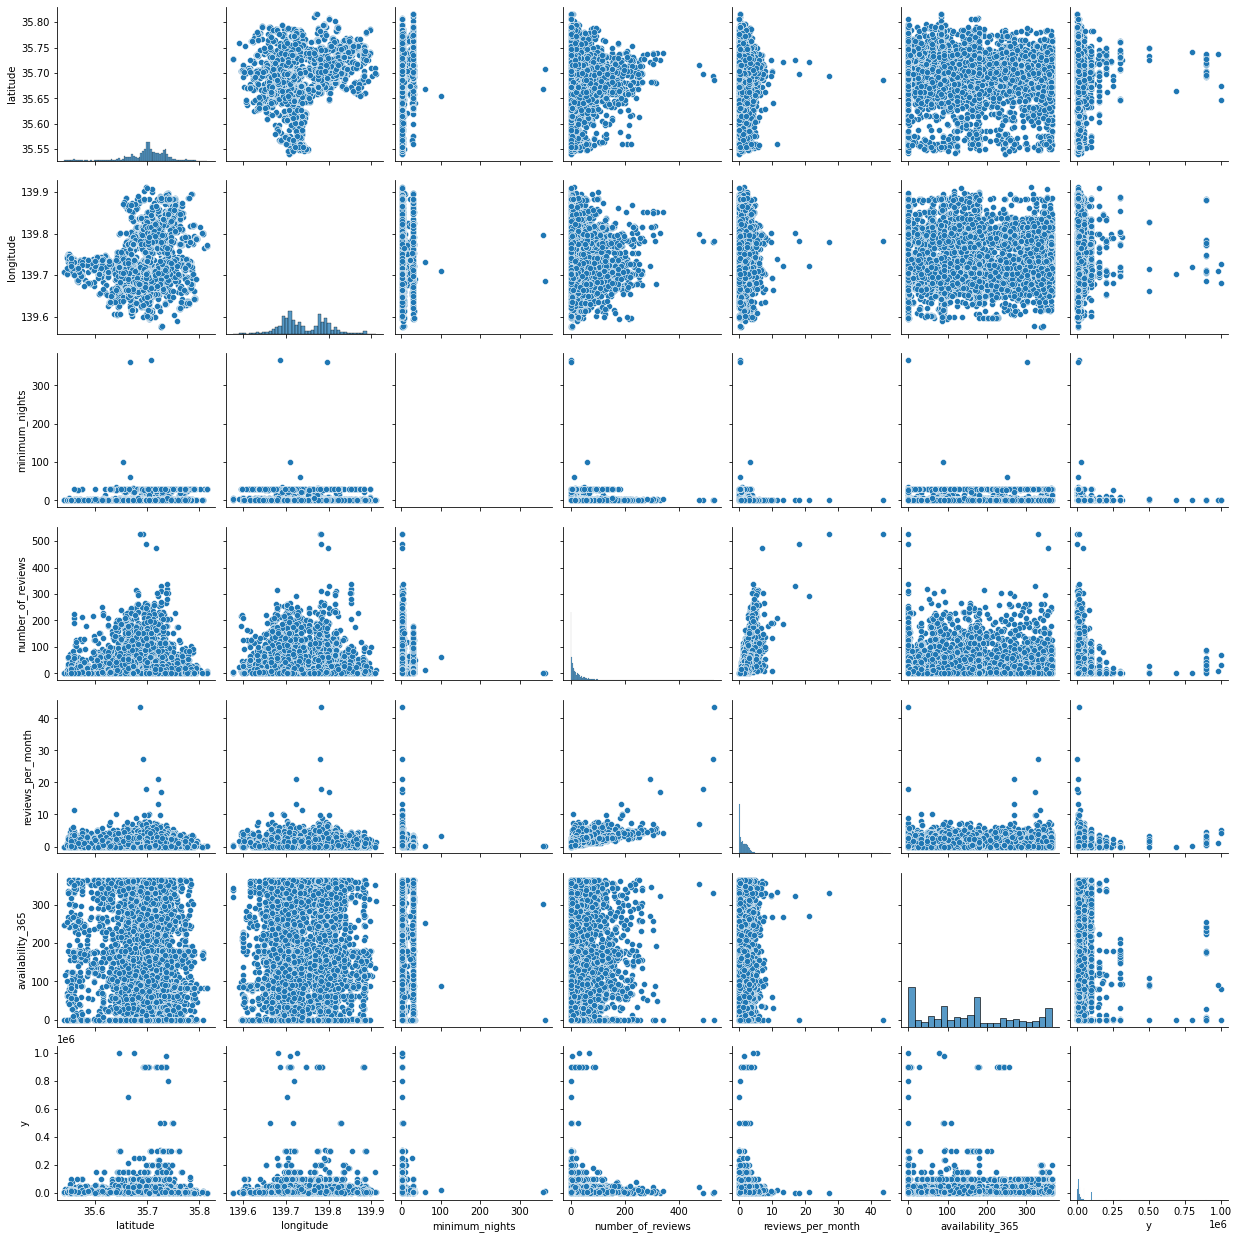

In [41]:
#データの散布図を見てみる
#数値データと目標値yとの関係。id,host_idを除く

sns.pairplot(data=train[numeric])

- number_of_reviewsとreviews_per_monthの間に、ほかの特徴量と比較して関係がありそう
- 各特徴量のヒストグラムを見る

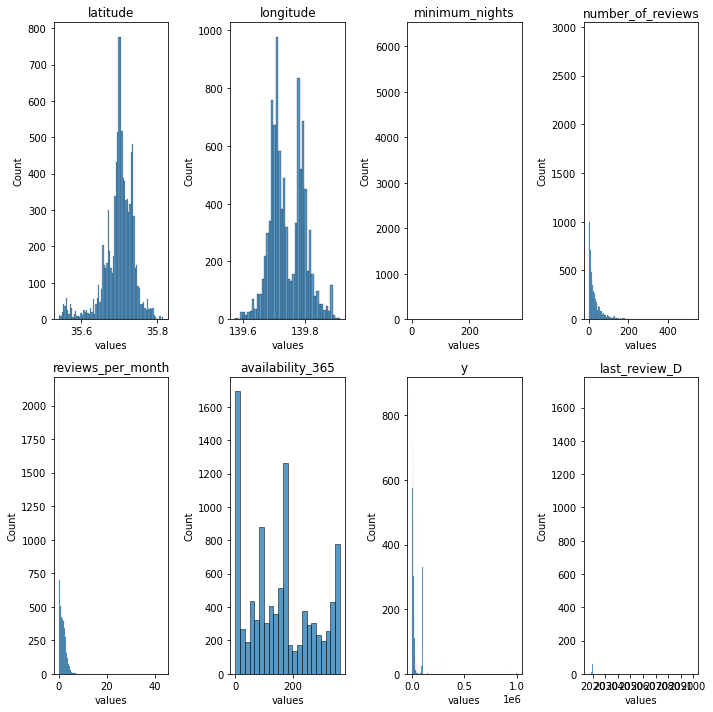

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(10,10))

for col, ax in zip(numeric, axes.ravel()):
    sns.histplot(train, x=train[col], stat='count', ax=ax)
    ax.set_xlabel('values')
    ax.set_title(col)
plt.tight_layout()
plt.show()

In [43]:
train['minimum_nights'].value_counts()

1      6217
2      2342
3       476
30      466
7        85
4        74
5        71
23       63
6        45
28       37
14       26
31       20
15       11
12       11
10        9
29        7
13        6
25        5
20        4
21        3
9         2
32        2
360       1
8         1
16        1
24        1
365       1
60        1
100       1
35        1
Name: minimum_nights, dtype: int64

In [44]:
train['number_of_reviews'].value_counts()

0      1699
1       711
2       491
3       431
4       326
6       277
5       238
7       223
8       215
9       186
11      178
14      174
10      165
13      162
12      145
17      140
16      137
15      137
18      121
19      113
20      113
22      105
23      103
21      102
24      100
29       98
28       93
27       91
30       89
25       87
26       82
32       78
34       73
31       68
38       63
35       62
33       58
39       58
40       57
41       57
44       55
43       54
36       52
49       52
46       51
42       49
37       47
50       47
52       44
45       43
54       43
57       39
51       39
53       39
47       39
58       36
48       34
65       32
55       30
61       30
56       27
73       25
59       25
64       25
60       23
67       23
66       23
63       23
82       22
72       22
62       22
77       20
69       20
81       19
78       18
87       17
80       17
71       17
68       17
76       17
75       17
95       16
70       16
94  

In [45]:
train['reviews_per_month'].value_counts()

0.00    1699
1.00      87
0.25      59
0.32      58
0.30      47
        ... 
5.01       1
4.66       1
5.84       1
4.37       1
5.73       1
Name: reviews_per_month, Length: 595, dtype: int64

In [46]:
train['y'].value_counts()

9931     10
9930      7
9956      7
6008      7
9988      7
         ..
12352     1
8781      1
6840      1
25079     1
45041     1
Name: y, Length: 7520, dtype: int64

- minimum_nights,number_of_reviews,reviews_per_monthがそれぞれ外れ値的な挙動を示しているデータがありそう
- 目的変数yの値もばらつきがみられるので、拡大したヒストグラムを表示する
- logitudeのヒストグラムに山が二つある

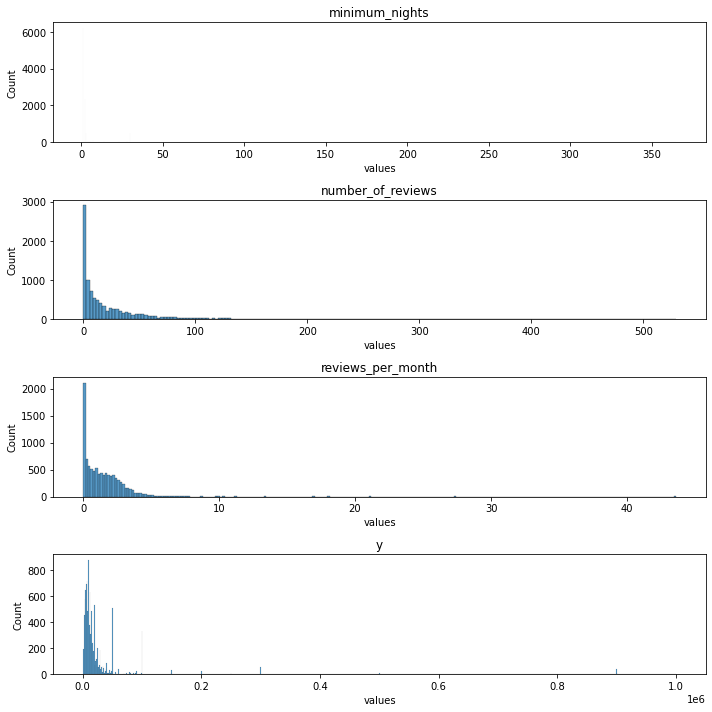

In [47]:
#「外れ値」的なデータが示される特徴量のグラフ
fig, axes = plt.subplots(4, 1, figsize=(10,10))
cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'y']

for col, ax in zip(cols, axes.ravel()):
    sns.histplot(train, x=train[col], stat='count', ax=ax)
    ax.set_xlabel('values')
    ax.set_title(col)
plt.tight_layout()
plt.show()

- testデータも同様に確かめる

In [48]:
test

name neighbourhood  \
0       5-minute walk from Akasaka Sta, Superior double     Minato Ku   
1          7 min Sta.-Center of IKEBUKURO Cozy Room#503    Toshima Ku   
2     Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min   Setagaya Ku   
3                    Komagome Station 2 minutes on foot    Toshima Ku   
4       Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara      Taito Ku   
...                                                 ...           ...   
4991         Stylish Pad In Nishi Shinjuku - Free WiFi!    Shibuya Ku   
4992                   U-6 鶯谷 BasaeInn Uguisudani Tokyo      Taito Ku   
4993        A convenient room! 〜SHINJUKU〜 【Pocket WiFi】   Shinjuku Ku   
4994       Shinjuku ShareHouse Dormitory1  with Balcony   Shinjuku Ku   
4995    3mins->Shinjuku Gyoenmae Sta/Standard Twin Room   Shinjuku Ku   

      latitude  longitude        room_type  minimum_nights  number_of_reviews  \
0     35.67131  139.73285     Private room               1                  0   
1     35.73014  139.71739  Entire home/apt               2                 21   
2     35.66193  139.66540  Entire home/apt               1                 14   
3     35.73603  139.74794  Entire home/apt               1                 16   
4     35.72126  139.78320  Entire home/apt              30                  2   
...        ...        ...              ...             ...                ...   
4991  35.68555  139.68015  Entire home/apt               2                 31   
4992  35.72499  139.77741      Shared room               2                  6   
4993  35.69102  139.70614  Entire home/apt               1                 12   
4994  35.69848  139.70435      Shared room               2                 71   
4995  35.69021  139.71057     Private room               3                  0   

     last_review  reviews_per_month  availability_365 last_review_D  
0     2100-01-01               0.00               183    2100-01-01  
1     2020-04-16               1.94               337    2020-04-16  
2     2020-02-12               0.82               240    2020-02-12  
3     2020-02-17               1.19                 0    2020-02-17  
4     2019-07-21               0.19               164    2019-07-21  
...          ...                ...               ...           ...  
4991  2019-12-15               1.60               174    2019-12-15  
4992  2018-08-25               0.27                90    2018-08-25  
4993  2020-03-14               2.54               113    2020-03-14  
4994  2020-01-01               0.96               273    2020-01-01  
4995  2100-01-01               0.00               212    2100-01-01  

[4996 rows x 11 columns]

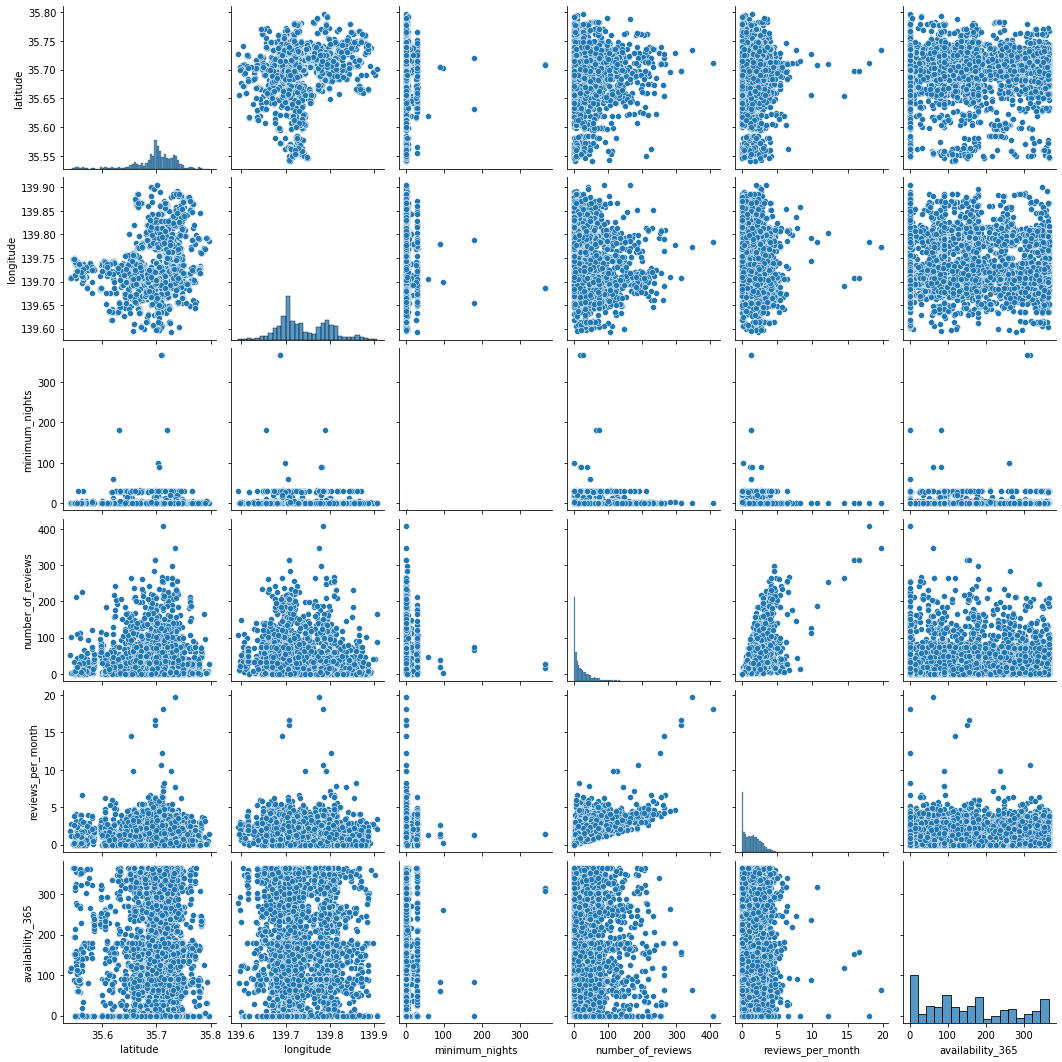

In [49]:
colums= ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','availability_365','last_review_D']
sns.pairplot(data=test[colums])

- trainデータと同様に、reviews_per_month,number_of_reviewsの間に何らかの関係がありそう

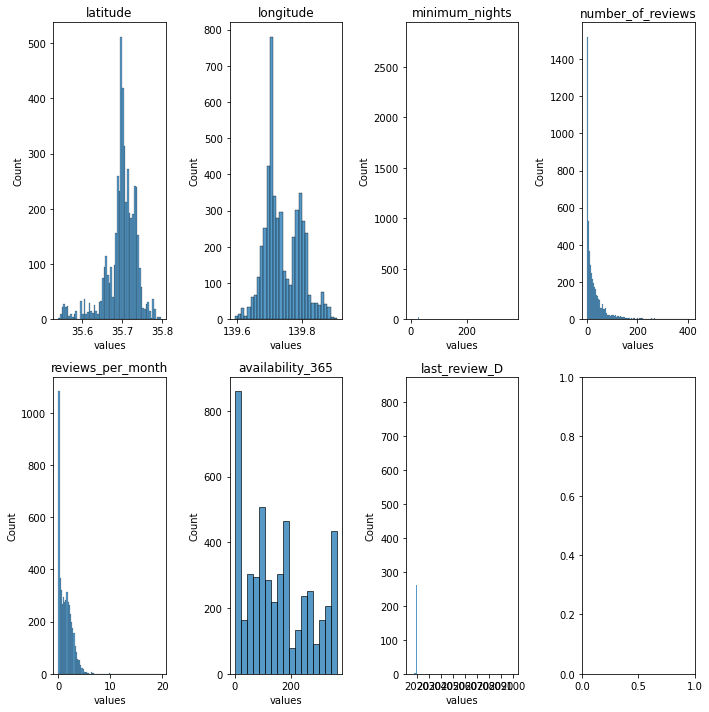

In [50]:
#testデータにおいてヒストグラムを見てみる
fig, axes = plt.subplots(2, 4, figsize=(10,10))

for col, ax in zip(colums, axes.ravel()):
    sns.histplot(test, x=test[col], ax=ax)
    ax.set_xlabel('values')
    ax.set_title(col)
plt.tight_layout()
plt.show()

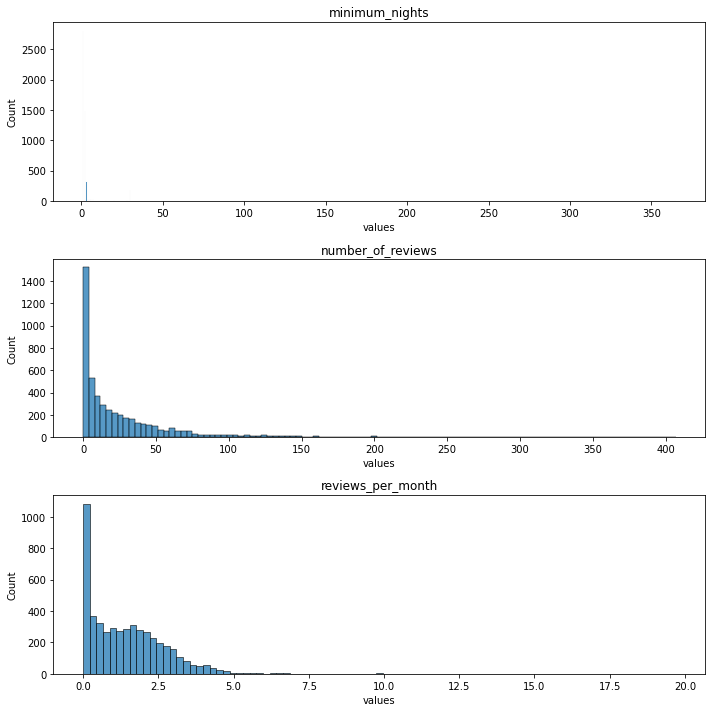

In [51]:
#「外れ値」的なデータが示される特徴量のグラフ
fig, axes = plt.subplots(3, 1, figsize=(10,10))
tcol = ['minimum_nights', 'number_of_reviews', 'reviews_per_month']

for col, ax in zip(tcol, axes.ravel()):
    sns.histplot(test, x=test[col], stat='count', ax=ax)
    ax.set_xlabel('values')
    ax.set_title(col)
plt.tight_layout()
plt.show()

- testデータもtrainデータと同じように外れ値的な値がみられる。
- trainデータよりもデータ範囲が狭そう
- 箱ひげ図でtrainとtestの差を見てみる

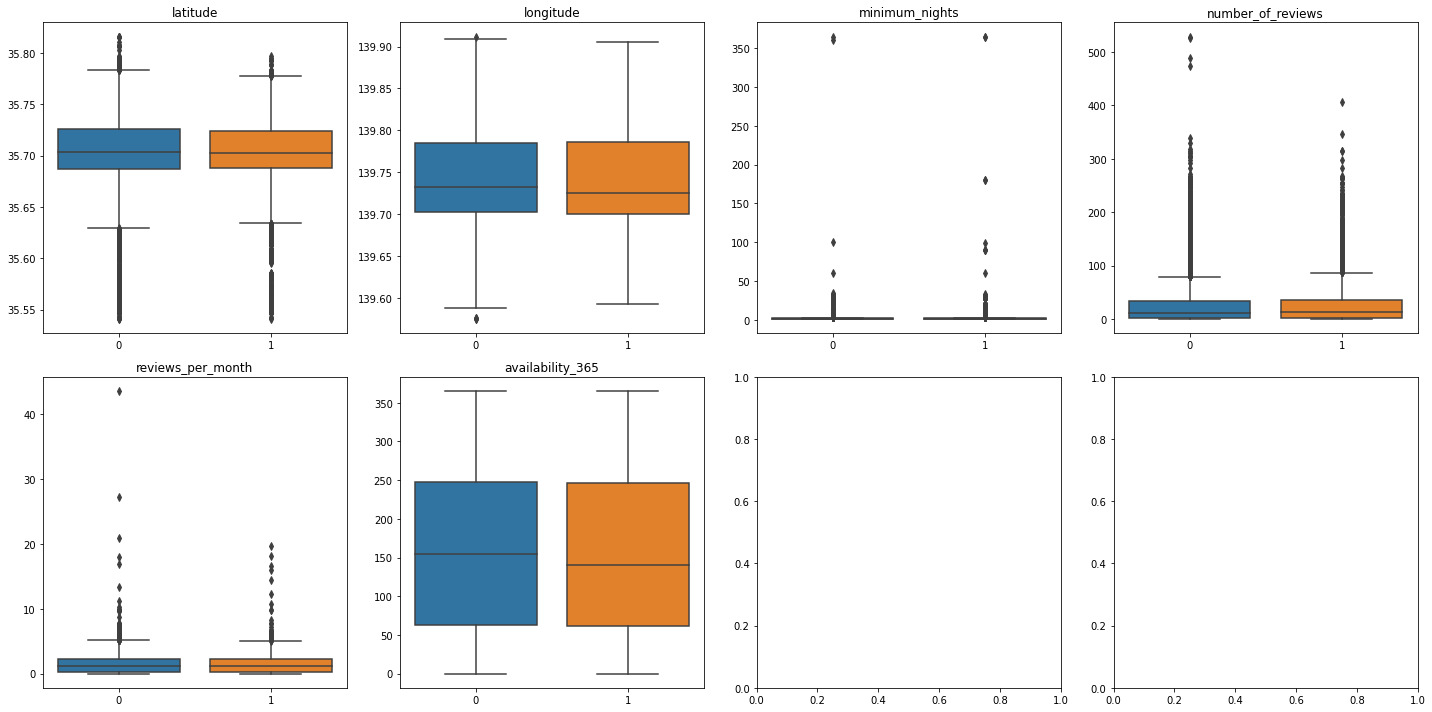

In [52]:
#箱ひげ図
fig, axes = plt.subplots(2, 4, figsize=(20,10))

nums = ['latitude','longitude','minimum_nights','number_of_reviews','reviews_per_month','availability_365']

for col, ax in zip(nums, axes.ravel()):
    sns.boxplot(data=[train[col], test[col]], ax=ax)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()

- 箱ひげ図において、第1四分位から第3四分位までおおよそ似た傾向がある
- testデータに比べてtrainデータのほうがnumber_of_reviews、reviews_per_monthに四分位範囲を超えるデータの幅が広いことが分かる

In [53]:
#last_review_Dの最大、最小値を見る
#trainもtestも最新の日付は近い
#testデータはtrainデータよりも1年以上前のデータを持つ

for i, df in enumerate([train,test]):
    t_day = df.query('last_review_D < datetime.datetime(2100,1,1)').agg({'last_review_D':['max','min']})
    if i==0:
        print('train')
    else:
        print('test')
    print(t_day)


train
    last_review_D
max    2020-04-29
min    2016-11-19
test
    last_review_D
max    2020-04-28
min    2015-05-25


In [54]:
#minimum_nightsについて、50以上のデータを抽出してみる→4件
#すべてEntire home/apt(自宅、アパート全体)
#minimum_nightsが365の物件は、availability_365が0→日ごろから民泊営業していない？
train.query('minimum_nights > 50')

name neighbourhood  \
2103  EarlyCheckIn/NewAprt./Legal/ShibuyaSta.8mins/WiFi    Shibuya Ku   
4189         Perfect Studio in Roppongi / Tokyo Midtown     Minato Ku   
4359  0. ENTIRE APARTMENT 450ft 2LDK NEAR SHIBUYA/YO...     Nakano Ku   
4738   Etchujima - spacious, luxurious, family friendly       Koto Ku   

      latitude  longitude        room_type  minimum_nights  number_of_reviews  \
2103  35.65420  139.70905  Entire home/apt             100                 62   
4189  35.66832  139.73198  Entire home/apt              60                 13   
4359  35.70829  139.68678  Entire home/apt             365                  1   
4738  35.66842  139.79696  Entire home/apt             360                  3   

     last_review  reviews_per_month  availability_365      y last_review_D  
2103  2020-01-01               3.26                89  25086    2020-01-01  
4189  2020-01-07               0.28               252   5462    2020-01-07  
4359  2019-08-05               0.11                 0  15107    2019-08-05  
4738  2019-02-23               0.14               301   9945    2019-02-23

<AxesSubplot:xlabel='minimum_nights', ylabel='Count'>

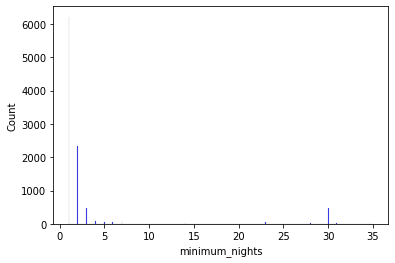

In [55]:
#minimum_nightsが50以下の物件について、ヒストグラムを見てみる
#30日(1か月)利用が存在
tr_nigt = train.query('minimum_nights < 50')
sns.histplot(data=tr_nigt, x=tr_nigt['minimum_nights'], color='blue', stat='count')

In [56]:
#利用日数を割合で示してみる
#1泊利用が全体の約62%で次いで2泊利用が23%
tmp = pd.DataFrame({'night_count':train['minimum_nights'].value_counts(), 
                    'pct':train['minimum_nights'].value_counts(). \
                    apply(lambda x: x/train['minimum_nights'].value_counts().sum())})


week = np.sum([tmp['pct'][i] for i in tmp.index if i < 8])
month = np.sum([tmp['pct'][i] for i in tmp.index if i==30 or i==28 or i==31]) #土日含む
print(f'week{week:.4f},month{month:.4f}')

week0.9319,month0.0524


In [57]:
tmp

night_count       pct
1           6217  0.622322
2           2342  0.234434
3            476  0.047648
30           466  0.046647
7             85  0.008509
4             74  0.007407
5             71  0.007107
23            63  0.006306
6             45  0.004505
28            37  0.003704
14            26  0.002603
31            20  0.002002
15            11  0.001101
12            11  0.001101
10             9  0.000901
29             7  0.000701
13             6  0.000601
25             5  0.000501
20             4  0.000400
21             3  0.000300
9              2  0.000200
32             2  0.000200
360            1  0.000100
8              1  0.000100
16             1  0.000100
24             1  0.000100
365            1  0.000100
60             1  0.000100
100            1  0.000100
35             1  0.000100

- 1週間利用までで全体の約93%
- うち1日利用が62%、2日利用が23%
- 土日含む30日前後利用が全体の5%
- 最短宿泊日数が0の物件はない

In [58]:
train['minimum_nights'].value_counts().sum()

9990

In [59]:
tmp.sum()

night_count    9990.0
pct               1.0
dtype: float64

In [60]:
train.head(2)

name neighbourhood  latitude  \
0  KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...       Koto Ku  35.68185   
1                  Downtown Tokyo Iriya next to Ueno      Taito Ku  35.72063   

   longitude        room_type  minimum_nights  number_of_reviews last_review  \
0  139.80310  Entire home/apt               1                 55  2020-04-25   
1  139.78536  Entire home/apt               6                 72  2020-03-25   

   reviews_per_month  availability_365      y last_review_D  
0               2.21               173  12008    2020-04-25  
1               2.11                 9   6667    2020-03-25

In [61]:
#number_of_reviewの情報を見る
#trainデータの全体の5%が100件以上の評価件数あり。人気の基準となるか

print(len(train.query('number_of_reviews > 100'))/len(train)) #100より多い
train.query('number_of_reviews > 100')

0.05345345345345345


name neighbourhood  \
39    501/MAX 5guests/Ryogoku/Asakusa/Skytree/Pocket...     Sumida Ku   
56    Juyoh Hotel Single Room with High-Bed and Shar...      Taito Ku   
58    ShinjukuTokyo Treehouse Free Pocket Wifi Certi...   Shinjuku Ku   
67     Ikebukuro tatami apartment B, public bath, wi-fi    Toshima Ku   
87                  So convenient All in 3minutes!wi-fi   Itabashi Ku   
...                                                 ...           ...   
9954  (Eng日中) BIG 3Bedroom Apartment Airport Easy Ac...    Arakawa Ku   
9961  My apartment is comfortable Located a 4-minute...   Shinjuku Ku   
9965      Japanese Modern Apt, 2 Stops to Shinjuku (#3)    Shibuya Ku   
9970     3min to Asakusa St.|New&Clean|Sky-tree|Wifi|1F      Taito Ku   
9971  Garden House NearShinjuku New Powerful clothdr...    Shibuya Ku   

      latitude  longitude        room_type  minimum_nights  number_of_reviews  \
39    35.70240  139.79844  Entire home/apt               1                113   
56    35.72789  139.80154     Private room               1                125   
58    35.71088  139.71213  Entire home/apt               2                165   
67    35.73057  139.69806  Entire home/apt               2                144   
87    35.78457  139.67793  Entire home/apt               3                102   
...        ...        ...              ...             ...                ...   
9954  35.73470  139.76833  Entire home/apt               2                116   
9961  35.70075  139.70320     Private room               1                106   
9965  35.67837  139.68001  Entire home/apt               1                159   
9970  35.70631  139.79458  Entire home/apt               1                198   
9971  35.68220  139.68124  Entire home/apt               7                151   

     last_review  reviews_per_month  availability_365      y last_review_D  
39    2020-04-26               5.65               156  16649    2020-04-26  
56    2020-03-17               6.50               337   2996    2020-03-17  
58    2020-03-01               3.57               319  16257    2020-03-01  
67    2020-01-25               3.51                 0   4228    2020-01-25  
87    2020-01-20               2.41               174   4497    2020-01-20  
...          ...                ...               ...    ...           ...  
9954  2020-02-28               2.21               168  23997    2020-02-28  
9961  2020-03-10               2.56                 0   5423    2020-03-10  
9965  2020-03-25               2.81                81  49886    2020-03-25  
9970  2020-03-22               4.25               247  10921    2020-03-22  
9971  2020-02-01               2.77                60  14087    2020-02-01  

[534 rows x 12 columns]

In [62]:
#200件以上は全体の1%
#104件の評価件数

print(len(train.query('number_of_reviews > 200'))/len(train))
train.query('number_of_reviews > 200')

0.01041041041041041


name  neighbourhood  \
205                      Y's B&Kitchen Tokyo +mwifi#HY1  Katsushika Ku   
311                      Stunning home in central Tokyo      Minato Ku   
335   Home stay with a Japanese language teacher family    Shinjuku Ku   
492   Spacious room for 4 guests in central Tokyo (30㎡)    Shinjuku Ku   
551   Tokyo Haneda Airport, Universal Haneda,Double ...         Ota Ku   
749                     Cedar APT  +  Free Pocket Wi-Fi  Katsushika Ku   
864   Japanese-style guest house near Asakusa & Skytree      Sumida Ku   
909            Dormitory room| Hotel&Hostel KIKKA Tokyo        Chuo Ku   
1075  GrapeHouse with openair bath nrSkytree bikeren...      Sumida Ku   
1155              Calm House near Shinjuku/Shibuya #201     Shibuya Ku   
1216     Green Apart Right In Shimokitazawa 2min walk!!    Setagaya Ku   
1234       Decoboco( Artist's Studio  the second floor)        Koto Ku   
1280  #213 ToeiShinjuku&Hanzomon. Sake&tea. 7min to ...        Koto Ku   
1374  Convenient apt 3-mins from sta/wifi(西新橋IT1ﾋﾞﾙ7...      Minato Ku   
1661  Shibuya Sta 3min. #2 completely renovated apart.,     Shibuya Ku   
1672               Calm House near Shinjuku/Shibuya#503     Shibuya Ku   
1679    The best location as a base of the sightseeing.      Bunkyo Ku   
1783   Japanese-Style Economy Single Room w Shared Bath       Taito Ku   
1809                     share house 'Miraie' @JR Osaki   Shinagawa Ku   
2027     『RAN Square』Sunshine60 Ikebukuro station Wi-Fi     Toshima Ku   
2186  Big 1floor 4BR 2 toilets 2bath in Shinjuku Shi...     Shibuya Ku   
2202                           ROOM IN CENTRAL TOKYO!!!   Shinagawa Ku   
2238    Seidokan .experience the rich history of Japan!     Arakawa Ku   
2380         Ikebukuro one-story house, 4 guests, wi-fi     Toshima Ku   
2418                       Azabu- spacious apt,Hammock♥      Minato Ku   
2530                                             東京下町生活       Taito Ku   
2567              Calm House near Shinjuku/Shibuya #102     Shibuya Ku   
2665    Designer's Flat - Shibuya YOYOGI park 10mins #1     Shibuya Ku   
2733              Calm House near Shinjuku/Shibuya #301     Shibuya Ku   
2816  Japanese cosy vintage house, easy access in Tokyo        Kita Ku   
2894                ★[107]☀15mins Shinjyuku GHIBLI Mus!    Suginami Ku   
2906  Spacious Apt for 6/TokyoTower/Ginza/wifi(西新橋IT...      Minato Ku   
2928   Hiromas Hostel in Kanda/Dormitory 1bed/male only     Chiyoda Ku   
3071                  Factory Roof-Top! +Portable Wi-Fi  Katsushika Ku   
3264  Seidokan 204/Quiet, entirely private room with...     Arakawa Ku   
3287        #4-Shinjuku 3min JR station Private  Room-D    Shinjuku Ku   
3424  Home stay with a Japanese language teacher fam...    Shinjuku Ku   
3453    #302 Private room. 3 people ok. 7mins from Sta.        Koto Ku   
3631      SHIBUYA SHINJUKU 5 minutes walk from  Station     Shibuya Ku   
3881  Shibuya.3min tram Max 4/Free wifi /Sangenjaya ...    Setagaya Ku   
3918                      ★[Room 106]  Near GHIBLI Mus!    Suginami Ku   
4207                         Asakusa Private Guest Room       Taito Ku   
4263     Shinjuku2min Shinokubo3minOkubo1min sterilizer    Shinjuku Ku   
4853        #3-Shinjuku 3min JR station Private  Room-C    Shinjuku Ku   
4883   Ikebukuro tatami apartment A, public bath, wi-fi     Toshima Ku   
4893      #102 SHIBUYA SHINJUKU 幡ヶ谷駅徒歩5分 観光ｼｮｯﾋﾟﾝｸﾞに便利!     Shibuya Ku   
4907              Calm House near Shinjuku/Shibuya #202     Shibuya Ku   
5177  ☆Japanese-style guest house near Asakusa & Sky...      Sumida Ku   
5215             Walk to Asakusa Ueno w/Skytree View #3       Taito Ku   
5250        #2-Shinjuku 3min JR station Private  Room-B    Shinjuku Ku   
5377          New design capsule hotel (co-ed, no lock)        Chuo Ku   
5405        #5-Shinjuku 3min JR station Private  Room-E    Shinjuku Ku   
5437  Mr.T's House, 2-Bed-rooms JP-style+Portable Wi-Fi  Katsushika Ku   
5503  Seidokan 202/Quiet, entirely private room with...

In [63]:
#300より多い件数は14件 0.1%
print(len(train.query('number_of_reviews > 300'))/len(train))
train.query('number_of_reviews > 300')

0.0014014014014014013


name  neighbourhood  \
909            Dormitory room| Hotel&Hostel KIKKA Tokyo        Chuo Ku   
1783   Japanese-Style Economy Single Room w Shared Bath       Taito Ku   
3071                  Factory Roof-Top! +Portable Wi-Fi  Katsushika Ku   
5377          New design capsule hotel (co-ed, no lock)        Chuo Ku   
5437  Mr.T's House, 2-Bed-rooms JP-style+Portable Wi-Fi  Katsushika Ku   
5562                                    Decoboco hanare        Koto Ku   
5712              Calm House near Shinjuku/Shibuya #305     Shibuya Ku   
5812  Seidokan 205 / Quiet, entirely private room wi...     Arakawa Ku   
6507          #301Good access 2 central Tokyo,7mins Sta        Koto Ku   
6729   A cozy private space! Mixed Dormitory with Wi-Fi       Taito Ku   
7085         2 Bed Room + 2 Toilets + Free Pocket Wi-Fi  Katsushika Ku   
7524  Airport pick-up&drop off service Asakusa New h...       Taito Ku   
7547              Wahuu Style APT + Free Portable Wi-Fi  Katsushika Ku   
8674            【自主隔離】浅草駅徒歩6分･貸切戸建て･浅草寺本堂まで徒歩1分!【空港お迎え】       Taito Ku   

      latitude  longitude        room_type  minimum_nights  number_of_reviews  \
909   35.69297  139.78034      Shared room               1                526   
1783  35.72614  139.80192     Private room               1                330   
3071  35.73937  139.85173     Private room               4                319   
5377  35.68655  139.78153     Private room               1                529   
5437  35.73963  139.85372  Entire home/apt               3                304   
5562  35.68154  139.81747  Entire home/apt               1                310   
5712  35.67949  139.67874  Entire home/apt               2                315   
5812  35.72671  139.78200  Entire home/apt               1                310   
6507  35.68288  139.81552  Entire home/apt               1                305   
6729  35.69850  139.78279      Shared room               1                488   
7085  35.73850  139.85167  Entire home/apt               4                339   
7524  35.71838  139.79672  Entire home/apt               1                305   
7547  35.73626  139.85024  Entire home/apt               4                304   
8674  35.71648  139.79926  Entire home/apt               1                474   

     last_review  reviews_per_month  availability_365      y last_review_D  
909   2020-03-13              27.30               330   2794    2020-03-13  
1783  2020-04-10              16.92               323   3301    2020-04-10  
3071  2020-02-24               4.46                48   5390    2020-02-24  
5377  2020-04-11              43.60                 0   9999    2020-04-11  
5437  2020-03-27               3.83                 0  12966    2020-03-27  
5562  2020-01-26               4.58                 0   8005    2020-01-26  
5712  2020-04-06               5.74               192  15051    2020-04-06  
5812  2020-04-20               5.42                89   2484    2020-04-20  
6507  2020-03-24               5.19               235   5046    2020-03-24  
6729  2020-03-16              18.01                 0   2205    2020-03-16  
7085  2020-03-13               4.07                 0  13114    2020-03-13  
7524  2020-03-30               7.02               258  40235    2020-03-30  
7547  2020-03-09               3.71                66  13434    2020-03-09  
8674  2020-04-12               6.99               355  40049    2020-04-12

In [64]:
#400より多い件数は4件 0.04%
#コロナ対応を行っている物件もある。
print(len(train.query('number_of_reviews > 400'))/len(train))
train.query('number_of_reviews > 400')

0.0004004004004004004


name neighbourhood  \
909           Dormitory room| Hotel&Hostel KIKKA Tokyo       Chuo Ku   
5377         New design capsule hotel (co-ed, no lock)       Chuo Ku   
6729  A cozy private space! Mixed Dormitory with Wi-Fi      Taito Ku   
8674           【自主隔離】浅草駅徒歩6分･貸切戸建て･浅草寺本堂まで徒歩1分!【空港お迎え】      Taito Ku   

      latitude  longitude        room_type  minimum_nights  number_of_reviews  \
909   35.69297  139.78034      Shared room               1                526   
5377  35.68655  139.78153     Private room               1                529   
6729  35.69850  139.78279      Shared room               1                488   
8674  35.71648  139.79926  Entire home/apt               1                474   

     last_review  reviews_per_month  availability_365      y last_review_D  
909   2020-03-13              27.30               330   2794    2020-03-13  
5377  2020-04-11              43.60                 0   9999    2020-04-11  
6729  2020-03-16              18.01                 0   2205    2020-03-16  
8674  2020-04-12               6.99               355  40049    2020-04-12

In [65]:
#testデータに対しても考えてみる
#trainデータと傾向は近い
print('100より多い',len(test.query('number_of_reviews > 100'))/len(test))
print('200より多い',len(test.query('number_of_reviews > 200'))/len(test))
print('300より多い',len(test.query('number_of_reviews > 300'))/len(test))
print('400より多い',len(test.query('number_of_reviews > 400'))/len(test))

100より多い 0.06144915932746197
200より多い 0.010808646917534028
300より多い 0.0008006405124099279
400より多い 0.00020016012810248197


In [66]:
#評価件数が最大なのに宿泊可能日数が0であるのは、コロナ対応で臨時休業した可能性あり
#ほかにっもこのようなデータがある可能性
test.query('number_of_reviews > 400')

name neighbourhood  \
2231  Tokyo BEST TOWN LANDSCAPE DEVELOPMENT AWARD wi...      Taito Ku   

      latitude  longitude   room_type  minimum_nights  number_of_reviews  \
2231  35.71152   139.7841  Hotel room               1                407   

     last_review  reviews_per_month  availability_365 last_review_D  
2231  2020-03-26              18.09                 0    2020-03-26

- availability_365 年間の宿泊可能日数が0のデータが、train,test両方の全体で一番多い
- 欠損値補完したデータ以外で0の値があるレコードを確認する

- 宿泊可能日数が0で最終閲覧日があるレコードは1139件

In [67]:
train.query('availability_365 == 0 & last_review != "2100-01-01"')

name  neighbourhood  \
9              【2/F】Asakusabashi Building | for 6-9 ppl       Taito Ku   
30    VIP新宿/Higashi Shinjuku station 3min/Bed size 1.8m    Shinjuku Ku   
34     Can enjoy cosplay ramen shop☆Ikebukuro8min☆AS485     Toshima Ku   
40    Uhome Koiwa Apartment2, 503, 1mn walk from sta...     Edogawa Ku   
67     Ikebukuro tatami apartment B, public bath, wi-fi     Toshima Ku   
...                                                 ...            ...   
9936                 【Rs,Hotel 204】直达成田机场/东京/秋叶原/新宿/迪士尼  Katsushika Ku   
9937       【New-built】1BunkBed Mix Dorm in Asakusa Ueno       Taito Ku   
9944         New open ! Shinjuku    東新宿､歌舞伎町､徒歩4分  1204    Shinjuku Ku   
9961  My apartment is comfortable Located a 4-minute...    Shinjuku Ku   
9988                          SHITARA HOUSE dormitory B  Katsushika Ku   

      latitude  longitude        room_type  minimum_nights  number_of_reviews  \
9     35.70020  139.78538  Entire home/apt               2                 74   
30    35.69882  139.71107  Entire home/apt               2                 24   
34    35.72689  139.70441  Entire home/apt               2                 61   
40    35.74165  139.88558  Entire home/apt               1                  6   
67    35.73057  139.69806  Entire home/apt               2                144   
...        ...        ...              ...             ...                ...   
9936  35.71766  139.86600  Entire home/apt               1                  3   
9937  35.70451  139.79303      Shared room               1                  8   
9944  35.69755  139.70566  Entire home/apt               1                 26   
9961  35.70075  139.70320     Private room               1                106   
9988  35.74672  139.82925      Shared room               1                  1   

     last_review  reviews_per_month  availability_365      y last_review_D  
9     2020-01-26               1.48                 0  24826    2020-01-26  
30    2020-01-20               2.38                 0   8799    2020-01-20  
34    2020-02-25               1.61                 0  12259    2020-02-25  
40    2019-11-12               0.66                 0  99990    2019-11-12  
67    2020-01-25               3.51                 0   4228    2020-01-25  
...          ...                ...               ...    ...           ...  
9936  2020-01-08               0.74                 0   8066    2020-01-08  
9937  2019-08-12               0.58                 0   2999    2019-08-12  
9944  2019-11-28               1.62                 0  19617    2019-11-28  
9961  2020-03-10               2.56                 0   5423    2020-03-10  
9988  2020-01-01               0.25                 0   3950    2020-01-01  

[1139 rows x 12 columns]

- availability_365が0だがlast_reviewが欠損しておらず、number_of_reviewsとreviews_per_monthが存在する物件は1139件
- new open, new builtなどの文言があるため、元ある物件が改装を行い情報サイトに広告を掲載している？ためサイト掲載時点で宿泊可能でない(予約)的な扱いか
- 実際の予約時に選択する宿泊日数はminimum_nightsで指定すると仮定

In [68]:
print(len(train.query('last_review == "2100-01-01"')))
print(len(train.query('availability_365 == 0 & last_review != "2100-01-01"')))
print(len(train.query('availability_365 == 0 & last_review == "2100-01-01"')))

1699
1139
277


In [69]:
print(len(train.query('availability_365 == 0 & number_of_reviews == 0')))
print(len(train.query('availability_365 == 0 & reviews_per_month == 0')))
print(len(train.query('availability_365 == 0 & number_of_reviews != 0')))
print(len(train.query('availability_365 == 0 & reviews_per_month != 0')))
print(len(train.query('availability_365 == 0 & number_of_reviews == 0 & reviews_per_month == 0')))
print(len(train.query('availability_365 == 0 & number_of_reviews != 0 & reviews_per_month == 0')))
print(len(train.query('availability_365 == 0 & number_of_reviews == 0 & reviews_per_month != 0')))

277
277
1139
1139
277
0
0


In [70]:
print(len(train.query('last_review == "2100-01-01" & number_of_reviews == 0 & reviews_per_month == 0')))
print(len(train.query('last_review == "2100-01-01" & number_of_reviews == 0 & reviews_per_month == 0 & availability_365 == 0')))

1699
277


- 最終閲覧日と評価件数のデータがない、かつひと月当たりの評価件数が0のレコードは1699件
- うち、年間の宿泊可能日数も0であるレコードは277

In [71]:
#最終閲覧日、評価件数、ひと月当たりの評価件数、年間宿泊可能日数なしの物件
train.query('last_review == "2100-01-01" & number_of_reviews == 0 & reviews_per_month == 0 & availability_365 == 0')

name  neighbourhood  \
13    QY52 JR Train station 5-min walk, airport dire...       Taito Ku   
43             Ran Large Corner Pod *駅徒歩1分*男性専用ﾌﾛｱ(鍵なし)        Chuo Ku   
153              匯家 KAIKE 浅草 双人背包客 sensoji 10mins 短期开放4       Taito Ku   
173   Twin bed ! Easy to shinjuku! beside YoyogiPark...     Shibuya Ku   
221   3 mins on foot to Asakusa Station! Sightseeing...       Taito Ku   
396   8min->JRIkebukuro Sta/SuperiorDouble/NoSmoke/B...     Toshima Ku   
400   MonthHOYO東京Kita Shinjuku#306/8min from Sta. +wifi    Shinjuku Ku   
595                                        sky house 2A      Sumida Ku   
606                            Kyukyu Hotel Family Room       Taito Ku   
671   [6 minutes walk from Higashi Ginza Station] Ex...        Chuo Ku   
676                                       上野浅草 日光 202号室     Arakawa Ku   
725    ★2LDK newly furnished vacation room★ up to 7 ppl       Taito Ku   
739              GS202/ShinJuku(shinookubo)*Free Wi-Fi*    Shinjuku Ku   
764         Authentic Japanese accommodation【Queen Bed】        Koto Ku   
781   [Male Dormitory] 9mins from JRShinjuku Sta. Ce...    Shinjuku Ku   
785               NEWopen Ikebukuro 9nimutes日本語中文한국어201     Toshima Ku   
865    TsuBaMe Hotel 201 步行5分钟浅草橋･浅草･秋葉原･免费WiFi･精品设计师房源       Taito Ku   
868        ★NEW★Cozy room in Ikebukuro area/ Share room     Toshima Ku   
879   [6 minutes walk from Higashi Ginza Station] Ex...        Chuo Ku   
1002  7 mins to Shibuya/Cozy room/Max 6 people/Free ...    Setagaya Ku   
1017           ★Free Wi-Fi★7min walking to Ginza!  7-3h        Chuo Ku   
1046       【浅草寺,天空树步行10分钟】地铁步行1分/阳台可看天空树/成田羽田机场直达(Q401)      Sumida Ku   
1076  3 mins on foot to Asakusa Station! Sightseeing...       Taito Ku   
1080      【涉谷3分钟,六本木3分钟】新宿池袋秋叶原银座直达/最近地铁站6分钟/美式大床(H301)     Shibuya Ku   
1124    新築ﾏﾝｼｮﾝ1棟貸切､駅近 新宿･池袋へｱｸｾｽ良好!全8部屋個室wifi完備ﾊﾞｽﾄｲﾚ別    Shinjuku Ku   
1125  [HK101/103]★★SALE★★JR Okubo 2 mins/Bunk bed for 2    Shinjuku Ku   
1167    6min->Asakusa Sta/Deluxe Group Room/Shared Bath      Sumida Ku   
1189                        BY102!池袋で買い物･遊びに便利♪Wi-Fi(W)     Toshima Ku   
1263            6min->Asakusa Sta/Mixed Dorm/1 bunk bed      Sumida Ku   
1290             GS101/ShinJuku(shinookubo)*Free Wi-Fi*    Shinjuku Ku   
1343      【涉谷3分钟,六本木3分钟】新宿池袋秋叶原银座直达/最近地铁站6分钟/美式大床(H101)     Shibuya Ku   
1392                                     和風小别墅 2楼 ｢空の间｣        Koto Ku   
1394  IMPREST STAY#6B 50㎡ﾘﾋﾞﾝｸﾞ/卒業旅行/東京横浜観光/6名様/品川8分...         Ota Ku   
1398         【八広】ﾙｰﾌﾄｯﾌﾟから東京ｽｶｲﾂﾘｰを一望☆お花見ｼｰｽﾞﾝにもﾊﾞｯﾁﾘ◎!      Sumida Ku   
1400        [Male Only] RUMa INN Rokugoudote ☆Free Wifi         Ota Ku   
1414     3LDK/New/Functional House in central Shinjuku.    Shinjuku Ku   
1456          Newly open Shinjuku center area apartment    Shinjuku Ku   
1471                 ★Free WiFi★ 2-bed for 3 people#804        Chuo Ku   
1478   A cozy private space! Mixed Dormitory with Wi-Fi       Taito Ku   
1486    【惠比寿,涉谷,六本木】车站6分钟全新设计师和风榻榻米/山手线惠比寿/毗邻茑屋书店(H502)     Shibuya Ku   
1545  MonthHOYO東京Nishi shinjyuku#201/2min from sta+wifi     Shibuya Ku   
1547   2 Floor house near Ikebukuro station for family!     Toshima Ku   
1698  新規ｵｰﾌﾟﾝ✣HOYOｽﾃｲ(ｼｮｰﾄ)西巣鴨/駅徒歩5分/ｾﾐﾀﾞﾌﾞﾙﾍﾞｯﾄ+PCﾃ...        Kita Ku   
1733              4mins Sta in Ueno Area Free wifi 5ppl       Taito Ku   
1790  6 People Family Room in Shinjuku/ Free Pocket-...    Shinjuku Ku   
1799  [Female Dormitory] 9mins from JRShinjuku Sta. ...    Shinjuku Ku   
1805    【ดีจังเฮ้าส์】Japanes style  お寺の中のｹﾞｽﾄﾊｳｽolympic       Taito Ku   
1807          3.5 bedrooms to Ikebukuro 1 stop/Max 9 pp     Toshima Ku   
1836  ★Skytree Spacious Japanese-style House/Zaito/1...      Sumida Ku   
1837    (403)Japanese Modern/Easy Access-Haneda Airport         Ota Ku   
1880                         Deluxe Double or Twin Room       Taito Ku   
1911  campaign☆Asakusa/Skytree/AsakusaSta4min/DonQui...       Taito Ku   
1918  [6 minutes walk from Higashi Ginza Station] Ex...        Chuo Ku   
1950    (302)Japanese Modern/Easy Access-Haneda Airport

- 最終閲覧日、評価件数、ひと月当たりの評価件数、年間宿泊可能日数なしの物件のnameには「new open」などの文言が複数含まれ、営業開始直後である可能性
- ほかにもcampaign, saleなどの文言があるため、既存物件の新規プランで情報サイトに掲載直後である可能性
- 新規物件や新規プランかどうかなど、nameの文字情報から抜き出して検索したい→分類わけのフラグを付ける
- nameにmonthの文言がある物件があるため、それらもnameから検索→分類わけのフラグを付ける
- 旅行用か仕事用か、単身向けかファミリー(団体)向けかなどもnameから探りたい→分類わけのフラグを付ける

In [72]:
print(len(test.query('minimum_nights == 0')))

0


In [73]:
print(len(test.query('last_review == "2100-01-01"')))
print(len(test.query('availability_365 == 0 & last_review != "2100-01-01"')))
print(len(test.query('availability_365 == 0 & last_review == "2100-01-01"')))

832
579
102


In [74]:
print(len(test.query('availability_365 == 0 & number_of_reviews == 0')))
print(len(test.query('availability_365 == 0 & reviews_per_month == 0')))
print(len(test.query('availability_365 == 0 & number_of_reviews != 0')))
print(len(test.query('availability_365 == 0 & reviews_per_month != 0')))
print(len(test.query('availability_365 == 0 & number_of_reviews == 0 & reviews_per_month == 0')))
print(len(test.query('availability_365 == 0 & number_of_reviews != 0 & reviews_per_month == 0')))
print(len(test.query('availability_365 == 0 & number_of_reviews == 0 & reviews_per_month != 0')))

102
102
579
579
102
0
0


- 宿泊可能日数が0で最終閲覧日があるものは579件

In [75]:
test.query('availability_365 == 0 & last_review != "2100-01-01"')

name neighbourhood  \
3                    Komagome Station 2 minutes on foot    Toshima Ku   
13           (201)羽田空港から車で15分新宿渋谷駅まで20分最寄り駅大森駅平和島駅徒歩10分        Ota Ku   
19    Shinagawa Matcha Place 10 mins walk to The sta...     Minato Ku   
37            Shin-Okubo 7min!! Easy access to Shinjuku   Shinjuku Ku   
56                 Private Capsule Room for Female Only    Chiyoda Ku   
...                                                 ...           ...   
4961    newly built big house for 12ppl in south Tokyo!  Shinagawa Ku   
4971                                     Ikebukuro  301    Toshima Ku   
4973  15mins to Shibuya! 20mins to Harajuku! Free Wi...   Setagaya Ku   
4983                       新大久保站步行3分钟,歌舞伎町步行5分钟 冠京别馆201   Shinjuku Ku   
4985            2Ff ookubo &Luxury Shinjuku/Pocket WIFI   Shinjuku Ku   

      latitude  longitude        room_type  minimum_nights  number_of_reviews  \
3     35.73603  139.74794  Entire home/apt               1                 16   
13    35.58078  139.72608     Private room               5                 22   
19    35.63408  139.73431  Entire home/apt               2                 93   
37    35.70087  139.70371  Entire home/apt               1                  9   
56    35.70213  139.77234     Private room               1                  5   
...        ...        ...              ...             ...                ...   
4961  35.59997  139.72303  Entire home/apt               1                 31   
4971  35.73642  139.71140  Entire home/apt               1                  6   
4973  35.63165  139.65478  Entire home/apt             180                 73   
4983  35.70145  139.70491     Private room               2                 17   
4985  35.69963  139.70336  Entire home/apt               1                 34   

     last_review  reviews_per_month  availability_365 last_review_D  
3     2020-02-17               1.19                 0    2020-02-17  
13    2019-10-28               1.68                 0    2019-10-28  
19    2020-01-09               2.50                 0    2020-01-09  
37    2020-03-20               0.68                 0    2020-03-20  
56    2020-01-11               0.84                 0    2020-01-11  
...          ...                ...               ...           ...  
4961  2019-04-06               1.25                 0    2019-04-06  
4971  2019-03-26               0.32                 0    2019-03-26  
4973  2018-07-26               1.33                 0    2018-07-26  
4983  2020-01-24               0.94                 0    2020-01-24  
4985  2020-03-15               3.68                 0    2020-03-15  

[579 rows x 11 columns]

- 宿泊可能日数が0および最終閲覧日が存在し、評価件数とひと月当たりの評価件数がない物件は579件

In [76]:
test.query('availability_365 == 0 & last_review != "2100-01-01" & number_of_reviews != 0 & reviews_per_month != 0')

name neighbourhood  \
3                    Komagome Station 2 minutes on foot    Toshima Ku   
13           (201)羽田空港から車で15分新宿渋谷駅まで20分最寄り駅大森駅平和島駅徒歩10分        Ota Ku   
19    Shinagawa Matcha Place 10 mins walk to The sta...     Minato Ku   
37            Shin-Okubo 7min!! Easy access to Shinjuku   Shinjuku Ku   
56                 Private Capsule Room for Female Only    Chiyoda Ku   
...                                                 ...           ...   
4961    newly built big house for 12ppl in south Tokyo!  Shinagawa Ku   
4971                                     Ikebukuro  301    Toshima Ku   
4973  15mins to Shibuya! 20mins to Harajuku! Free Wi...   Setagaya Ku   
4983                       新大久保站步行3分钟,歌舞伎町步行5分钟 冠京别馆201   Shinjuku Ku   
4985            2Ff ookubo &Luxury Shinjuku/Pocket WIFI   Shinjuku Ku   

      latitude  longitude        room_type  minimum_nights  number_of_reviews  \
3     35.73603  139.74794  Entire home/apt               1                 16   
13    35.58078  139.72608     Private room               5                 22   
19    35.63408  139.73431  Entire home/apt               2                 93   
37    35.70087  139.70371  Entire home/apt               1                  9   
56    35.70213  139.77234     Private room               1                  5   
...        ...        ...              ...             ...                ...   
4961  35.59997  139.72303  Entire home/apt               1                 31   
4971  35.73642  139.71140  Entire home/apt               1                  6   
4973  35.63165  139.65478  Entire home/apt             180                 73   
4983  35.70145  139.70491     Private room               2                 17   
4985  35.69963  139.70336  Entire home/apt               1                 34   

     last_review  reviews_per_month  availability_365 last_review_D  
3     2020-02-17               1.19                 0    2020-02-17  
13    2019-10-28               1.68                 0    2019-10-28  
19    2020-01-09               2.50                 0    2020-01-09  
37    2020-03-20               0.68                 0    2020-03-20  
56    2020-01-11               0.84                 0    2020-01-11  
...          ...                ...               ...           ...  
4961  2019-04-06               1.25                 0    2019-04-06  
4971  2019-03-26               0.32                 0    2019-03-26  
4973  2018-07-26               1.33                 0    2018-07-26  
4983  2020-01-24               0.94                 0    2020-01-24  
4985  2020-03-15               3.68                 0    2020-03-15  

[579 rows x 11 columns]

In [77]:
print(len(test.query('last_review == "2100-01-01" & number_of_reviews == 0 & reviews_per_month == 0')))
print(len(test.query('last_review == "2100-01-01" & number_of_reviews == 0 & reviews_per_month == 0 & availability_365 == 0')))

832
102


- 最終閲覧日かつ評価件数がなく、ひと月当たりの評価件数が0の物件は832件
- うち年間宿泊可能日数も0の物件は102件

In [78]:
#最終閲覧日、評価件数、ひと月当たりの評価件数、年間宿泊可能日数なしの物件
test.query('last_review == "2100-01-01" & number_of_reviews == 0 & reviews_per_month == 0 & availability_365 == 0')

name  neighbourhood  \
54                                Shibuya new apartment      Adachi Ku   
110               Fukuwauchi Deluxe Japanese-Style Room      Sumida Ku   
165     Fukuwauchi Deluxe with Tatami Area and Sofa Bed      Sumida Ku   
235             Fukuwauchi Deluxe Room with Tatami Area      Sumida Ku   
264                     NEW OPEN  竹ﾉ秀 B001 人気ｴﾘｱ☆ｱｸｾｽ便利    Shinjuku Ku   
298   6min->JRSuidobashi Sta/Small Double/NoSmoke/Br...      Bunkyo Ku   
345    Mix Dorm / Near the Onsen / No Cleaning fee! #2C   Shinagawa Ku   
373    Muslim friendly! "HALAL"  Moosa’s guest room 301        Koto Ku   
451     [Superb] Nippori's warm rooms / Awesome 302 303     Arakawa Ku   
496   PrivateRoom 1BS-Easy access Nippori/Ueno“YB Ho...     Arakawa Ku   
497   G22 Center area Shinjuku, Best rate w/ Pocket ...    Shinjuku Ku   
525     [Superb] Nippori's warm rooms / Awesome 203 204     Arakawa Ku   
654       Japanese-Style Twin Room with Shared Bathroom    Shinjuku Ku   
658    Newly built/ maisonette type / max 5p /Free WiFi       Taito Ku   
664   Long stay welcome discount/4 access/Asakusa 3 ...        Chuo Ku   
666   【MONTHLY】SKYTREE AREA! 2MIN TO STN! 8PPL! 2DK!...      Sumida Ku   
675                           3 min from Ryogoku Sta.        Sumida Ku   
707   【Rs, Hotel #203】NRT/Disney/Shinjuku/Akiba Dire...  Katsushika Ku   
760        OPEN SALE !池袋至近!住環境良好!最寄駅まで徒歩5分!FREE Wi-fi !     Toshima Ku   
826   【Rs, Hotel #201】NRT/Disney/Shinjuku/Akiba Dire...  Katsushika Ku   
840   Downtown Tokyo 2 days stay and secret experiences      Sumida Ku   
898   6min->JRSuidobashi Sta/StudioDouble/NoSmoke/No...      Bunkyo Ku   
899                   Twin Capsule Room for Female Only     Chiyoda Ku   
909   【Rs, Hotel Entire】NRT/Disney/Shinjuku/Akiba Di...  Katsushika Ku   
1043    Japanese-Style Double Room with Shared Bathroom    Shinjuku Ku   
1046             ｢江戶川日式公寓102｣直達秋葉原､新宿;交通便利､周邊繁華､步行地鐵5分鐘     Edogawa Ku   
1054  5-minute walk from Akasaka Sta, Single B  with BF      Minato Ku   
1119                        六本木ﾌﾟﾗｻﾞﾎﾃﾙにて楽しい時間をお過ごし下さい｡      Minato Ku   
1164  [Japanese-style] Breakfast incl./5mins from Sh...        Chuo Ku   
1260  30%OFFIkebukuro area/JRYamanote/ Nearest sta 4min     Toshima Ku   
1269       Monthly rent☆40% discount☆2LDK Ueno area. #5       Taito Ku   
1444                          巢鸭车站 徒步6分钟 一栋民宿 空间宽敞 交通便利     Toshima Ku   
1503  2min JR Komagome|Yamanote Line|Max4|WIFI|Hoshi202        Kita Ku   
1531  SKYTREE D3 /Airport Direct/5 min ST./Near Asakusa      Sumida Ku   
1568       Straight line for the Haneda .Just renovated         Ota Ku   
1611  PrivateRoom 3B-Easy access Nippori/Ueno “YB Ho...     Arakawa Ku   
1656             6min->sta/Superior Twin/NoSmoke/NoMeal    Shinjuku Ku   
1730    Japanese-Style Single Room with Shared Bathroom    Shinjuku Ku   
1740  ﾌﾞﾙｯｸﾘﾝｽﾀｲﾙﾎﾃﾙｻﾞｽﾀﾝﾀﾞｰﾄﾞｱﾊﾟｰﾄﾒﾝﾄ渋谷Iｲﾝｽﾀ映え 女子会､...     Shibuya Ku   
1981               Standard double room, with Breakfast      Minato Ku   
2019  5-minute walk from Akasaka Sta, Superior twin ...      Minato Ku   
2029  6min->JRSuidobashi Sta/SmallDouble/NoSmoke/NoMeal      Bunkyo Ku   
2173                               东京奥运特别酒店东京新酒店为中国台湾香港     Arakawa Ku   
2257  【3 mins walk to Nishikasai station】Free bus to...     Edogawa Ku   
2285                                     ﾂｲﾝ喫煙 浴室とﾄｲﾚが別      Minato Ku   
2336    NEW OPEN!Katsushika area/ For a long stay room!  Katsushika Ku   
2414               【二段ﾍﾞｯﾄﾞﾂｲﾝﾙｰﾑ】TX｢浅草｣駅 徒歩7分!無料Wi-Fi!       Taito Ku   
2441  【 ☆LaDY only ROOM☆ 】★GUEST HOUSE SaKURa★6ﾍﾞｯﾄﾞ...      Sumida Ku   
2443   New Sale! Great Access! Okubo Large Room  Max8pp    Shinjuku Ku   
2447  【Rs, Hotel #204】NRT/Disney/Shinjuku/Akiba Dire...     Edogawa Ku   
2488  Easy access to shinjuku/long term RSV welcome#319    Shinjuku Ku   
2608                  【女性専用ﾄﾞﾐﾄﾘｰ】TX｢浅草｣駅 徒歩7分!無料Wi-Fi!       Taito Ku   
2797                         Akihabara Inn Family Rooms       Taito Ku   
2817          Close to Shibuya/Convenient Apartment#202

In [79]:
#宿泊施設と最寄り駅を計算
#駅情報データに重複があるので、それぞれが別の鉄道会社の駅である可能性があるため整理する
count = station['station_name'].value_counts()
st_dup = [i for i in count.index if count[i] > 1]

In [80]:
#同名の駅が複数あるのが70個ある
len(st_dup), st_dup

(70,
 ['池袋',
  '渋谷',
  '新宿',
  '大手町',
  '北千住',
  '浅草',
  '飯田橋',
  '新橋',
  '日比谷',
  '五反田',
  '市ケ谷',
  '四ツ谷',
  '南千住',
  '新宿三丁目',
  '秋葉原',
  '中井',
  '錦糸町',
  '東中野',
  '浅草橋',
  '練馬',
  '新木場',
  '青山一丁目',
  '本郷三丁目',
  '中延',
  '目黒',
  '下北沢',
  '荻窪',
  '王子',
  '巣鴨',
  '品川',
  '代々木',
  '高田馬場',
  '中野坂上',
  '亀戸',
  '国分寺',
  '麻布十番',
  '豊洲',
  '両国',
  '御茶ノ水',
  '西日暮里',
  '吉祥寺',
  '町屋',
  '上野',
  '神田',
  '東京',
  '汐留',
  '玉川上水',
  '高幡不動',
  '駒込',
  '豊島園',
  '八丁堀',
  '蒲田',
  '町田',
  '高尾',
  '大井町',
  '天王洲アイル',
  '恵比寿',
  '早稲田',
  '六本木',
  '明治神宮前〈原宿〉',
  '神保町',
  '多摩動物公園',
  '浜松町',
  '羽田空港第3ターミナル',
  '東新宿',
  '水道橋',
  '三越前',
  '日本橋',
  '有楽町',
  '熊野前'])

In [81]:
st_tmp = [station[station['station_name'] == i] for i in st_dup]

- 重複した駅の緯度経度は、それぞれ近い値をとっている
- おそらく、駅名が示すエリアにある各種鉄道会社の駅がそれぞれ示されている
- レコードの一番上を基準として、駅と駅の相対的な距離を測る

In [82]:
st_tmp

[    station_name   longitude   latitude
 103           池袋  139.708291  35.731464
 105           池袋  139.710088  35.729565
 106           池袋  139.710678  35.730924
 107           池袋  139.711086  35.730256
 108           池袋  139.711461  35.729130,
    station_name   longitude   latitude
 94           渋谷  139.700872  35.658700
 95           渋谷  139.701000  35.659066
 96           渋谷  139.701238  35.658871
 97           渋谷  139.702148  35.658020
 98           渋谷  139.702417  35.659545,
    station_name   longitude   latitude
 89           新宿  139.698812  35.688690
 90           新宿  139.699187  35.690163
 91           新宿  139.699574  35.691435
 92           新宿  139.700464  35.689729
 93           新宿  139.700711  35.692350,
     station_name   longitude   latitude
 430          大手町  139.762959  35.684856
 433          大手町  139.763399  35.686154
 435          大手町  139.764107  35.686860
 437          大手町  139.766086  35.684801
 438          大手町  139.766200  35.686564,
     station_name   long

- 2地点の座標は地点1が（緯度=lat1, 経度=lon1)、地点2（緯度=lat2, 経度=lon2)とする
- レコードの1番目が地点1とする
- 球面上の最短距離(D)を求める公式
- D＝6371 * arccos{cos(lat1) + cos(lat2) ∗ cos(lon2−lon1) + sin(lat1) ∗ sin(lat2)}

In [83]:
st_tmp[0].reset_index(drop=True).loc[0, 'longitude']

139.708291

In [84]:
len(st_tmp[0])

5

In [85]:
np.pi/180

0.017453292519943295

In [86]:
6371 * np.arccos(0.9999999991266364)

0.2662687181783341

In [87]:
st_dist = []
for i in range(0, len(st_tmp)):
    dis = []
    for n in range(0, len(st_tmp[i])):
        x = st_tmp[i].reset_index(drop=True)
        t = 6371 * np.arccos(np.cos(x.loc[0, 'latitude']*np.pi/180) 
                 * np.cos(x.loc[n, 'latitude']*np.pi/180)
                 * np.cos(x.loc[n, 'longitude']*np.pi/180 - x.loc[0, 'longitude']*np.pi/180)
                 + np.sin(x.loc[0, 'latitude']*np.pi/180) 
                 * np.sin(x.loc[n, 'latitude']*np.pi/180))
        if np.isnan(t):
            dis.append(0)
        else:
            dis.append(t)
    nn = pd.DataFrame({'distance':dis})
    st_dist.append(pd.concat([st_tmp[i].reset_index(drop=True), nn], axis=1))

/tmp/ipykernel_49/3891013870.py:6: RuntimeWarning: invalid value encountered in arccos
  t = 6371 * np.arccos(np.cos(x.loc[0, 'latitude']*np.pi/180)
/tmp/ipykernel_49/3891013870.py:6: RuntimeWarning: invalid value encountered in arccos
  t = 6371 * np.arccos(np.cos(x.loc[0, 'latitude']*np.pi/180)
/tmp/ipykernel_49/3891013870.py:6: RuntimeWarning: invalid value encountered in arccos
  t = 6371 * np.arccos(np.cos(x.loc[0, 'latitude']*np.pi/180)
/tmp/ipykernel_49/3891013870.py:6: RuntimeWarning: invalid value encountered in arccos
  t = 6371 * np.arccos(np.cos(x.loc[0, 'latitude']*np.pi/180)
/tmp/ipykernel_49/3891013870.py:6: RuntimeWarning: invalid value encountered in arccos
  t = 6371 * np.arccos(np.cos(x.loc[0, 'latitude']*np.pi/180)
/tmp/ipykernel_49/3891013870.py:6: RuntimeWarning: invalid value encountered in arccos
  t = 6371 * np.arccos(np.cos(x.loc[0, 'latitude']*np.pi/180)
/tmp/ipykernel_49/3891013870.py:6: RuntimeWarning: invalid value encountered in arccos
  t = 6371 * np.arc

- レコード1番目のデータはJRの駅であると仮定(緯度経度により確認)
- その他駅もJR駅周辺にある私鉄各線であると仮定
- ただ、駅によってはJR駅から離れた位置(500m以上)に存在する駅があるため、駅の座標を丸ごと平均してエリア表示は一旦しない
- 駅とは別にエリアクラスタリングを行う
- 重複のある駅に_Aや_Bなどとラベルを付けて、各物件と最も近い駅を推定し、1または0のクラス分け

In [88]:
st_dist

[  station_name   longitude   latitude  distance
 0           池袋  139.708291  35.731464  0.000000
 1           池袋  139.710088  35.729565  0.266269
 2           池袋  139.710678  35.730924  0.223671
 3           池袋  139.711086  35.730256  0.285820
 4           池袋  139.711461  35.729130  0.386305,
   station_name   longitude   latitude  distance
 0           渋谷  139.700872  35.658700  0.000000
 1           渋谷  139.701000  35.659066  0.042308
 2           渋谷  139.701238  35.658871  0.038144
 3           渋谷  139.702148  35.658020  0.137867
 4           渋谷  139.702417  35.659545  0.168262,
   station_name   longitude   latitude  distance
 0           新宿  139.698812  35.688690  0.000000
 1           新宿  139.699187  35.690163  0.167255
 2           新宿  139.699574  35.691435  0.312892
 3           新宿  139.700464  35.689729  0.188697
 4           新宿  139.700711  35.692350  0.441633,
   station_name   longitude   latitude  distance
 0          大手町  139.762959  35.684856  0.000000
 1          大手町  

- 物件の位置と駅の位置の距離を計算し、どの駅に本当は近いのかを求め、グループ分けを行う

In [89]:

long = []
lat = []
name = []
for i in range(0, len(st_tmp)):
    x = st_tmp[i]
    lon_mean = x['longitude'].mean(axis=0)
    lat_mean = x['latitude'].mean(axis=0)
    long.append(lon_mean)
    lat.append(lat_mean)
    name.append(x.iloc[0, 0])
st_mean = pd.DataFrame({'station_name':name,
                        'longitude':long,
                        'latitude':lat})


# st_dist = []
# for i in range(0, len(st_tmp)):
#     dis = []
#     for n in range(0, len(st_tmp[i])):
#         x = st_tmp[i].reset_index(drop=True)
#         t = 6371 * np.arccos(np.cos(x.loc[0, 'latitude']*np.pi/180) 
#                  * np.cos(x.loc[n, 'latitude']*np.pi/180)
#                  * np.cos(x.loc[n, 'longitude']*np.pi/180 - x.loc[0, 'longitude']*np.pi/180)
#                  + np.sin(x.loc[0, 'latitude']*np.pi/180) 
#                  * np.sin(x.loc[n, 'latitude']*np.pi/180))
#         if np.isnan(t):
#             dis.append(0)
#         else:
#             dis.append(t)
#     nn = pd.DataFrame({'distance':dis})
#     st_dist.append(pd.concat([st_tmp[i].reset_index(drop=True), nn], axis=1)) 
# 

In [90]:
st_mean

station_name   longitude   latitude
0            池袋  139.710321  35.730268
1            渋谷  139.701535  35.658840
2            新宿  139.699750  35.690473
3           大手町  139.764550  35.685847
4           北千住  139.804951  35.749493
5            浅草  139.796291  35.711473
6           飯田橋  139.744949  35.702105
7            新橋  139.759028  35.666177
8           日比谷  139.759633  35.674956
9           五反田  139.724057  35.626113
10          市ケ谷  139.736074  35.691787
11          四ツ谷  139.730047  35.685553
12          南千住  139.799152  35.733281
13        新宿三丁目  139.705331  35.690772
14          秋葉原  139.774340  35.698557
15           中井  139.686662  35.714571
16          錦糸町  139.814538  35.697190
17          東中野  139.683712  35.706710
18          浅草橋  139.785366  35.697427
19           練馬  139.654569  35.737648
20          新木場  139.826828  35.646002
21        青山一丁目  139.724060  35.672847
22        本郷三丁目  139.760005  35.707066
23           中延  139.713131  35.605739
24           目黒  139.715638  35.633598
25          下北沢  139.667213  35.661597
26           荻窪  139.620113  35.704414
27           王子  139.737854  35.753252
28           巣鴨  139.738911  35.733474
29           品川  139.738544  35.628522
30          代々木  139.701854  35.683139
31         高田馬場  139.704230  35.713008
32         中野坂上  139.682594  35.697505
33           亀戸  139.826526  35.697526
34          国分寺  139.480194  35.700480
35         麻布十番  139.736583  35.655592
36           豊洲  139.795812  35.654350
37           両国  139.795378  35.696336
38         御茶ノ水  139.764454  35.700109
39         西日暮里  139.766684  35.732106
40          吉祥寺  139.580036  35.702705
41           町屋  139.781000  35.742543
42           上野  139.777083  35.712636
43           神田  139.770770  35.692380
44           東京  139.765405  35.681572
45           汐留  139.760313  35.663287
46         玉川上水  139.418150  35.731991
47         高幡不動  139.414068  35.661920
48           駒込  139.747248  35.736892
49          豊島園  139.648545  35.742061
50          八丁堀  139.777344  35.674734
51           蒲田  139.715329  35.562142
52           町田  139.445407  35.543113
53           高尾  139.281920  35.641835
54          大井町  139.734938  35.606896
55       天王洲アイル  139.750734  35.621735
56          恵比寿  139.709529  35.647008
57          早稲田  139.720123  35.708786
58          六本木  139.731505  35.663379
59    明治神宮前〈原宿〉  139.704681  35.668784
60          神保町  139.757863  35.695729
61       多摩動物公園  139.404150  35.648940
62          浜松町  139.756941  35.655529
63  羽田空港第3ターミナル  139.768587  35.544422
64          東新宿  139.707571  35.698418
65          水道橋  139.754736  35.702719
66          三越前  139.773370  35.686004
67          日本橋  139.774619  35.681883
68          有楽町  139.763535  35.675578
69          熊野前  139.769450  35.749092

In [91]:
count

池袋               5
渋谷               5
新宿               5
大手町              5
北千住              4
                ..
八幡山              1
高井戸              1
上北沢              1
下井草              1
東京国際クルーズターミナル    1
Name: station_name, Length: 649, dtype: int64

In [92]:
sing_st = [i for i in count.index if count[i] == 1]
sing_st

['御成門',
 '後楽園',
 '桜田門',
 '霞ケ関',
 '昭和島',
 '西武柳沢',
 '東久留米',
 '虎ノ門',
 '新小金井',
 '御徒町',
 '東小金井',
 '九段下',
 '花小金井',
 '武蔵野台',
 '大泉学園',
 '多磨霊園',
 '競艇場前',
 'つくし野',
 '一橋学園',
 '府中本町',
 '青梅街道',
 '整備場',
 '分倍河原',
 '西国分寺',
 '稲城長沼',
 '二子玉川',
 '上石神井',
 '西太子堂',
 '浮間舟渡',
 'ときわ台',
 '神谷町',
 '学芸大学',
 '池尻大橋',
 '上中里',
 '小竹向原',
 '都立大学',
 '中野新橋',
 '新江古田',
 '三軒茶屋',
 '自由が丘',
 '田園調布',
 '東武練馬',
 '千歳烏山',
 '駒沢大学',
 '東高円寺',
 '芝公園',
 '新高島平',
 '新高円寺',
 '西高島平',
 '都立家政',
 '下高井戸',
 '阿佐ケ谷',
 '富士見台',
 '武蔵大和',
 '千歳船橋',
 '芦花公園',
 '京王永山',
 '甲州街道',
 '本駒込',
 '宮ノ前',
 '東銀座',
 '西大島',
 '鐘ヶ淵',
 '小川町',
 '東向島',
 '東陽町',
 '淡路町',
 '五反野',
 '谷在家',
 '扇大橋',
 '日暮里',
 '越中島',
 '三ノ輪',
 '田原町',
 '竹ノ塚',
 '西新井',
 '新豊洲',
 '市場前',
 '末広町',
 '稲荷町',
 '馬喰町',
 '人形町',
 '大師前',
 '茅場町',
 '三河島',
 '勝どき',
 '新富町',
 '小村井',
 '南砂町',
 '天空橋',
 '北綾瀬',
 '東大和市',
 '泉体育館',
 '砂川七番',
 '内幸町',
 '岩本町',
 '武蔵砂川',
 '西武立川',
 '北八王子',
 '箱根ケ崎',
 '東大前',
 '京王片倉',
 '日の出',
 '西八王子',
 'めじろ台',
 '武蔵引田',
 '高尾山口',
 '武蔵増戸',
 '日向和田',
 '江戸川',
 '一之江',
 '新柴又',
 '西葛西',
 '千駄木',
 '新小岩',
 '東大島',
 '四ツ木',
 '志村

In [93]:
name = []
s_long = []
s_lat = []
for s in sing_st:
    for t in range(0, len(station)):
        if s == station.loc[t, 'station_name']:
            name.append(s)
            s_long.append(station.loc[t, 'longitude'])
            s_lat.append(station.loc[t, 'latitude'])
sing_tmp = pd.DataFrame({'station_name':name,
                         'longitude':s_long,
                         'latitude':s_lat})

In [94]:
sing_tmp

station_name   longitude   latitude
0              御成門  139.751535  35.661215
1              後楽園  139.751864  35.707898
2              桜田門  139.751490  35.677405
3              霞ケ関  139.750899  35.673838
4              昭和島  139.749918  35.570656
..             ...         ...        ...
574            八幡山  139.614927  35.669982
575            高井戸  139.615115  35.683253
576            上北沢  139.623290  35.668857
577            下井草  139.624688  35.723852
578  東京国際クルーズターミナル  139.773157  35.621462

[579 rows x 3 columns]

In [95]:
n_station = pd.concat([st_mean, sing_tmp], axis=0)

In [96]:
n_station

station_name   longitude   latitude
0               池袋  139.710321  35.730268
1               渋谷  139.701535  35.658840
2               新宿  139.699750  35.690473
3              大手町  139.764550  35.685847
4              北千住  139.804951  35.749493
..             ...         ...        ...
574            八幡山  139.614927  35.669982
575            高井戸  139.615115  35.683253
576            上北沢  139.623290  35.668857
577            下井草  139.624688  35.723852
578  東京国際クルーズターミナル  139.773157  35.621462

[649 rows x 3 columns]

In [97]:
df_min = train.query('name.str.contains("min") | name.str.contains("分")')

In [98]:
df_min

name  neighbourhood  \
0     KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...        Koto Ku   
2           Japan Style,Private,Affordable,4min to Sta.  Katsushika Ku   
3       4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi     Shibuya Ku   
5     Quiet residential Shinjuku area,8 min on foot Sta    Shinjuku Ku   
6     5mins walk to sta. /FamilyMat /double room liuqm1     Arakawa Ku   
...                                                 ...            ...   
9983    【Asakusa sta. 5min】 Quadruple room|TokyoAsakusa       Taito Ku   
9984            Yumi home@S0SD (5 min from 東新宿駅)3 floor    Shinjuku Ku   
9985           Shinjuku Kabukicho2 / Shinjuku 3min walk    Shinjuku Ku   
9986    Hostel just 1 min from Sta. / Dorm with curtain       Taito Ku   
9987   Hostel just 5 min from Sta./4 bed room with bath       Taito Ku   

      latitude  longitude        room_type  minimum_nights  number_of_reviews  \
0     35.68185  139.80310  Entire home/apt               1                 55   
2     35.74723  139.82349  Entire home/apt               1                 18   
3     35.68456  139.68077  Entire home/apt               1                  2   
5     35.71273  139.69687  Entire home/apt               2                 30   
6     35.73180  139.79445  Entire home/apt               1                  8   
...        ...        ...              ...             ...                ...   
9983  35.71158  139.79691     Private room               1                  6   
9984  35.70023  139.70562  Entire home/apt               1                  2   
9985  35.69728  139.70321  Entire home/apt               1                  1   
9986  35.70407  139.79180      Shared room               1                  0   
9987  35.71501  139.79417     Private room               1                  5   

     last_review  reviews_per_month  availability_365      y last_review_D  
0     2020-04-25               2.21               173  12008    2020-04-25  
2     2020-03-23               3.46               288   9923    2020-03-23  
3     2020-04-02               1.76                87   8109    2020-04-02  
5     2020-03-29               5.20               335   8404    2020-03-29  
6     2020-04-15               1.69               111   5811    2020-04-15  
...          ...                ...               ...    ...           ...  
9983  2019-10-17               0.31               304  14724    2019-10-17  
9984  2020-03-24               1.30               179  13491    2020-03-24  
9985  2019-12-09               0.21               357  13505    2019-12-09  
9986  2100-01-01               0.00               153   3279    2100-01-01  
9987  2019-12-10               0.22               156  14898    2019-12-10  

[4821 rows x 12 columns]

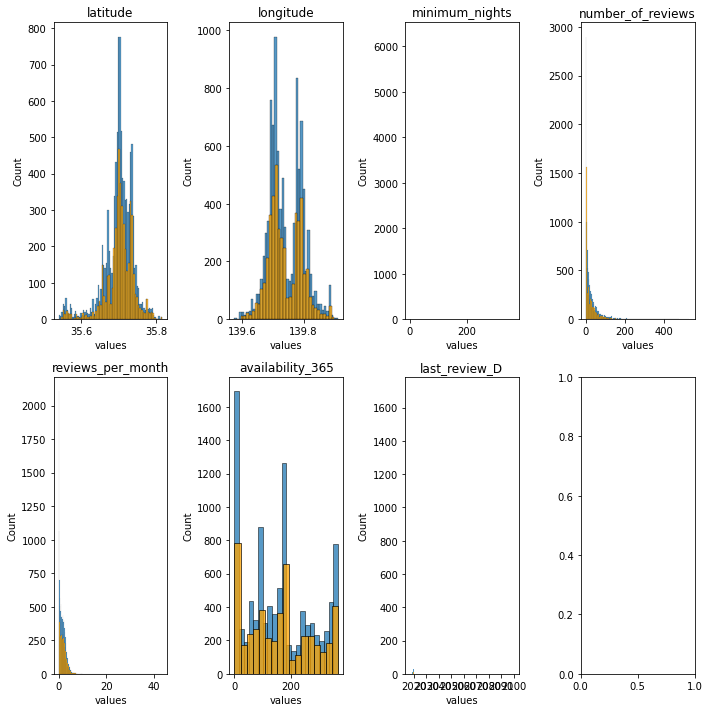

In [99]:
#testデータにおいてヒストグラムを見てみる
fig, axes = plt.subplots(2, 4, figsize=(10,10))

for col, ax in zip(colums, axes.ravel()):
    sns.histplot(train, x=train[col], ax=ax)
    sns.histplot(df_min, x=df_min[col], ax=ax, color='orange')
    ax.set_xlabel('values')
    ax.set_title(col)
plt.tight_layout()
plt.show()

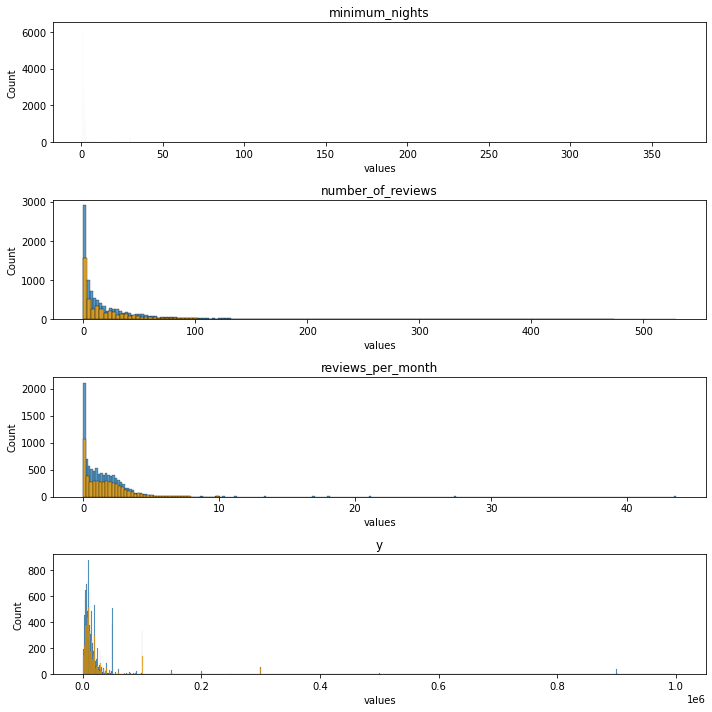

In [100]:
#「外れ値」的なデータが示される特徴量のグラフ
fig, axes = plt.subplots(4, 1, figsize=(10,10))
cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'y']

for col, ax in zip(cols, axes.ravel()):
    sns.histplot(train, x=train[col], stat='count', ax=ax)
    sns.histplot(df_min, x=df_min[col], stat='count', ax=ax, color='orange')
    ax.set_xlabel('values')
    ax.set_title(col)
plt.tight_layout()
plt.show()

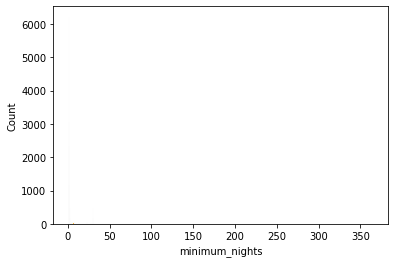

In [101]:
fig = plt.subplots(1,1)

sns.histplot(train.query('minimum_nights < 31'), x=train['minimum_nights'], stat='count')
sns.histplot(df_min.query('minimum_nights < 31'), x=df_min['minimum_nights'], stat='count', color='orange')
plt.show()

In [102]:
len(df_min.query('minimum_nights < 31')), len(df_min)

(4816, 4821)

- 名前にminまたは分とつくデータはほぼすべてが31泊(1か月)以内
- 最寄り駅、宿泊タイプ、閲覧日と評価日の差、年月日の分割、にてラベル付けを行う
- 最寄り駅は、特徴量が膨大になるがひとまずone-hot-encoding
- →最も近い駅を計算によって求める(longnitude/latitudeが最も近い駅でラベル付け)
- 最寄駅からの距離を計算
- 宿泊タイプは1-3日をshort,4-7をweek、8-14をlongstay、15-31をmonthry、32以上をverylongとしてラベル付け
- 閲覧日-評価日で表現
- 年と月と日は分割するか、基準日からの引き算を1000で割って秒単位にする

In [103]:
# #距離を求める
# #ネットよりコードを拝借
# import math
 
# # 複数の座標のうちx, yに一番近い座標を求める
# def nearstation(longitude, latitude, points):
#     result = {}
#     if len(points) == 0:
#         return result
#     result["longitude"] = points.loc[0, "longitude"]
#     result["latitude"] = points.loc[0, "latitude"]
#     ins_long = points.loc[0, 'longitude'] - longitude
#     ins_lat = points.loc[0, 'latitude'] - latitude
#     # stdval = math.sqrt((points.loc[0, "longitude"] - longitude) ** 2 + (points.loc[0, "latitude"] - latitude) ** 2)
#     for i in range(0, len(points)):
#         dif_long = points.loc[i, 'longitude'] - longitude
#         dif_lat = points.loc[i, 'latitude'] - latitude
#         # distance = math.sqrt((points.loc[i, "longitude"] - longitude) ** 2 + (points.loc[i, "latitude"] - latitude) ** 2)
#         if ins_long > dif_long and ins_lat > dif_lat:
#             result["longitude"] = points.loc[i, "longitude"]
#             result["latitude"] = points.loc[i, "latitude"]
#             result["station_name"] = points.loc[i, "station_name"]
#         ins_long = dif_long
#         ins_lat = dif_lat
#     return result

In [104]:
# stn = []
# for i in tqdm.tqdm(range(0, len(train))):
#     x = nearstation(train.loc[i, 'longitude'], train.loc[i, 'latitude'], n_station)
#     stn.append(x)
# st_name = pd.DataFrame(stn)

In [105]:
# #距離を求める
# #ネットよりコードを拝借

# def nearstation(target, station):
#     L = np.array([])
#     for i in tqdm.tqdm(range(target.shape[0])):
#         for s in range(station.shape[0]):
#             norm = np.sqrt((station.loc[s, 'longitude'] - target.loc[i, 'longitude'])**2 
#                            +(station.loc[s, 'latitude'] - target.loc[i, 'latitude'])**2)
#             L = np.append(L, norm)
#             # print('L完了')
#     return np.argmin(L) ,station[np.argmin(L)]

In [106]:
n_station.reset_index(drop='index', inplace=True)

In [107]:
# 距離を求める
from scipy.spatial import distance

min_dis_tr = []
for i in tqdm.tqdm(range(train.shape[0])):
    L = []
    for s in range(n_station.shape[0]):
        x = (train.loc[i, 'longitude'], train.loc[i, 'latitude'])
        y = (n_station.loc[s, 'longitude'], n_station.loc[s, 'latitude'])
        L.append(distance.euclidean(x, y))
    min_dis_tr.append(np.argmin(L))

100%|██████████| 9990/9990 [04:40<00:00, 35.62it/s]


In [108]:
near_st_tr = []
for i in min_dis_tr:
    near_st_tr.append(n_station.loc[i, 'station_name'])

In [109]:
len(near_st_tr)

9990

In [110]:
train['station_name'] = near_st_tr

In [111]:
train.head()

name  neighbourhood  latitude  \
0  KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...        Koto Ku  35.68185   
1                  Downtown Tokyo Iriya next to Ueno       Taito Ku  35.72063   
2        Japan Style,Private,Affordable,4min to Sta.  Katsushika Ku  35.74723   
3    4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi     Shibuya Ku  35.68456   
4      LICENSED SHINJUKU HOUSE: Heart of the action!    Shinjuku Ku  35.69840   

   longitude        room_type  minimum_nights  number_of_reviews last_review  \
0  139.80310  Entire home/apt               1                 55  2020-04-25   
1  139.78536  Entire home/apt               6                 72  2020-03-25   
2  139.82349  Entire home/apt               1                 18  2020-03-23   
3  139.68077  Entire home/apt               1                  2  2020-04-02   
4  139.70467  Entire home/apt               1                 86  2020-01-30   

   reviews_per_month  availability_365       y last_review_D station_name  
0               2.21               173   12008    2020-04-25         清澄白河  
1               2.11                 9    6667    2020-03-25           入谷  
2               3.46               288    9923    2020-03-23        堀切菖蒲園  
3               1.76                87    8109    2020-04-02       西新宿五丁目  
4               2.00               156  100390    2020-01-30          東新宿

In [112]:
#テストデータ考える
min_dis_ts = []
for i in tqdm.tqdm(range(test.shape[0])):
    L = []
    for s in range(n_station.shape[0]):
        x = (test.loc[i, 'longitude'], test.loc[i, 'latitude'])
        y = (n_station.loc[s, 'longitude'], n_station.loc[s, 'latitude'])
        L.append(distance.euclidean(x, y))
    min_dis_ts.append(np.argmin(L))

100%|██████████| 4996/4996 [02:21<00:00, 35.18it/s]


In [113]:
near_st_ts = []
for i in min_dis_ts:
    near_st_ts.append(n_station.loc[i, 'station_name'])

In [114]:
near_st_ts

['赤坂',
 '東池袋',
 '下北沢',
 '駒込',
 '入谷',
 '水道橋',
 '梅屋敷',
 '学習院下',
 '秋葉原',
 '高円寺',
 '新大久保',
 '西新井大師西',
 '新江古田',
 '大森',
 '雑色',
 '押上〈スカイツリー前〉',
 '浅草',
 '東新宿',
 '大久保',
 '高輪台',
 '下落合',
 '京急蒲田',
 '大久保',
 '北池袋',
 '新小岩',
 '本郷三丁目',
 '糀谷',
 '新小岩',
 '水天宮前',
 '四谷三丁目',
 '新板橋',
 '広尾',
 '新三河島',
 '新大久保',
 '石川台',
 '千駄木',
 '田原町',
 '新大久保',
 '大久保',
 '三ノ輪',
 '三ノ輪',
 '稲荷町',
 '稲荷町',
 '大久保',
 '京急蒲田',
 '浅草橋',
 '都立家政',
 '北池袋',
 '西新井大師西',
 '田原町',
 '堀切菖蒲園',
 '田原町',
 '新宿御苑前',
 '新小岩',
 '五反野',
 '新日本橋',
 '末広町',
 '新大塚',
 '下北沢',
 '中板橋',
 '京成高砂',
 '神泉',
 '中野新橋',
 '青砥',
 '入谷',
 '新宿三丁目',
 '西武新宿',
 '押上〈スカイツリー前〉',
 '大久保',
 '新大久保',
 '浅草',
 '赤羽',
 '西新宿五丁目',
 '北池袋',
 '水天宮前',
 '西日暮里',
 '大森',
 '浅草',
 '大久保',
 '上町',
 '池袋',
 '千住大橋',
 '本所吾妻橋',
 '上中里',
 '大塚駅前',
 '乃木坂',
 '下落合',
 '十条',
 '浅草',
 '渋谷',
 '渋谷',
 '西新井大師西',
 '板橋',
 '西新宿',
 '西新宿五丁目',
 '江戸川橋',
 '渋谷',
 '赤坂',
 '新御徒町',
 '谷在家',
 '入谷',
 '都立家政',
 '京成立石',
 '三ノ輪',
 '中目黒',
 '入谷',
 '押上〈スカイツリー前〉',
 '平井',
 '浅草',
 '駒込',
 '本所吾妻橋',
 '浅草',
 '東新宿',
 '平井',
 '東新宿',
 '稲荷町',
 '四谷三丁目',
 '南千住',
 '錦糸町',
 

In [115]:
test['station_name'] = near_st_ts

In [116]:
test.head()

name neighbourhood  latitude  \
0    5-minute walk from Akasaka Sta, Superior double     Minato Ku  35.67131   
1       7 min Sta.-Center of IKEBUKURO Cozy Room#503    Toshima Ku  35.73014   
2  Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min   Setagaya Ku  35.66193   
3                 Komagome Station 2 minutes on foot    Toshima Ku  35.73603   
4    Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara      Taito Ku  35.72126   

   longitude        room_type  minimum_nights  number_of_reviews last_review  \
0  139.73285     Private room               1                  0  2100-01-01   
1  139.71739  Entire home/apt               2                 21  2020-04-16   
2  139.66540  Entire home/apt               1                 14  2020-02-12   
3  139.74794  Entire home/apt               1                 16  2020-02-17   
4  139.78320  Entire home/apt              30                  2  2019-07-21   

   reviews_per_month  availability_365 last_review_D station_name  
0               0.00               183    2100-01-01           赤坂  
1               1.94               337    2020-04-16          東池袋  
2               0.82               240    2020-02-12          下北沢  
3               1.19                 0    2020-02-17           駒込  
4               0.19               164    2019-07-21           入谷

In [117]:
#テーブルの結合
n_train = pd.merge(train, n_station, how='left', on='station_name')

In [118]:
n_train.head()

name  neighbourhood  \
0  KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...        Koto Ku   
1                  Downtown Tokyo Iriya next to Ueno       Taito Ku   
2        Japan Style,Private,Affordable,4min to Sta.  Katsushika Ku   
3    4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi     Shibuya Ku   
4      LICENSED SHINJUKU HOUSE: Heart of the action!    Shinjuku Ku   

   latitude_x  longitude_x        room_type  minimum_nights  \
0    35.68185    139.80310  Entire home/apt               1   
1    35.72063    139.78536  Entire home/apt               6   
2    35.74723    139.82349  Entire home/apt               1   
3    35.68456    139.68077  Entire home/apt               1   
4    35.69840    139.70467  Entire home/apt               1   

   number_of_reviews last_review  reviews_per_month  availability_365       y  \
0                 55  2020-04-25               2.21               173   12008   
1                 72  2020-03-25               2.11                 9    6667   
2                 18  2020-03-23               3.46               288    9923   
3                  2  2020-04-02               1.76                87    8109   
4                 86  2020-01-30               2.00               156  100390   

  last_review_D station_name  longitude_y  latitude_y  
0    2020-04-25         清澄白河   139.798851   35.682105  
1    2020-03-25           入谷   139.783924   35.719862  
2    2020-03-23        堀切菖蒲園   139.827545   35.747649  
3    2020-04-02       西新宿五丁目   139.684304   35.689798  
4    2020-01-30          東新宿   139.707571   35.698418

In [119]:
#最寄り駅との距離を測る
st_dist_tr = []
for i in range(0, len(n_train)):
    x = n_train.loc[i, :]
    t = 6371 * np.arccos(np.cos(x['latitude_x']*np.pi/180) 
                 * np.cos(x['latitude_y']*np.pi/180)
                 * np.cos(x['longitude_y']*np.pi/180 - x['longitude_x']*np.pi/180)
                 + np.sin(x['latitude_x']*np.pi/180) 
                 * np.sin(x['latitude_y']*np.pi/180))
    if np.isnan(t):
        st_dist_tr.append(0)
    else:
        st_dist_tr.append(t)


In [120]:
n_train['st_dist'] = st_dist_tr

In [121]:
n_train.head()

name  neighbourhood  \
0  KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...        Koto Ku   
1                  Downtown Tokyo Iriya next to Ueno       Taito Ku   
2        Japan Style,Private,Affordable,4min to Sta.  Katsushika Ku   
3    4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi     Shibuya Ku   
4      LICENSED SHINJUKU HOUSE: Heart of the action!    Shinjuku Ku   

   latitude_x  longitude_x        room_type  minimum_nights  \
0    35.68185    139.80310  Entire home/apt               1   
1    35.72063    139.78536  Entire home/apt               6   
2    35.74723    139.82349  Entire home/apt               1   
3    35.68456    139.68077  Entire home/apt               1   
4    35.69840    139.70467  Entire home/apt               1   

   number_of_reviews last_review  reviews_per_month  availability_365       y  \
0                 55  2020-04-25               2.21               173   12008   
1                 72  2020-03-25               2.11                 9    6667   
2                 18  2020-03-23               3.46               288    9923   
3                  2  2020-04-02               1.76                87    8109   
4                 86  2020-01-30               2.00               156  100390   

  last_review_D station_name  longitude_y  latitude_y   st_dist  
0    2020-04-25         清澄白河   139.798851   35.682105  0.384816  
1    2020-03-25           入谷   139.783924   35.719862  0.155237  
2    2020-03-23        堀切菖蒲園   139.827545   35.747649  0.368901  
3    2020-04-02       西新宿五丁目   139.684304   35.689798  0.664157  
4    2020-01-30          東新宿   139.707571   35.698418  0.261971

In [122]:
#テーブルの結合
n_test = pd.merge(test, n_station, how='left', on='station_name')

In [123]:
n_test.head()

name neighbourhood  \
0    5-minute walk from Akasaka Sta, Superior double     Minato Ku   
1       7 min Sta.-Center of IKEBUKURO Cozy Room#503    Toshima Ku   
2  Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min   Setagaya Ku   
3                 Komagome Station 2 minutes on foot    Toshima Ku   
4    Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara      Taito Ku   

   latitude_x  longitude_x        room_type  minimum_nights  \
0    35.67131    139.73285     Private room               1   
1    35.73014    139.71739  Entire home/apt               2   
2    35.66193    139.66540  Entire home/apt               1   
3    35.73603    139.74794  Entire home/apt               1   
4    35.72126    139.78320  Entire home/apt              30   

   number_of_reviews last_review  reviews_per_month  availability_365  \
0                  0  2100-01-01               0.00               183   
1                 21  2020-04-16               1.94               337   
2                 14  2020-02-12               0.82               240   
3                 16  2020-02-17               1.19                 0   
4                  2  2019-07-21               0.19               164   

  last_review_D station_name  longitude_y  latitude_y  
0    2100-01-01           赤坂   139.738348   35.673230  
1    2020-04-16          東池袋   139.719546   35.725732  
2    2020-02-12          下北沢   139.667213   35.661597  
3    2020-02-17           駒込   139.747248   35.736892  
4    2019-07-21           入谷   139.783924   35.719862

In [124]:
n_test.shape

(4996, 14)

In [125]:
#最寄り駅との距離を測る
#テストデータ
st_dist_ts = []
for i in range(0, len(n_test)):
    x = n_test.loc[i, :]
    t = 6371 * np.arccos(np.cos(x['latitude_x']*np.pi/180) 
                 * np.cos(x['latitude_y']*np.pi/180)
                 * np.cos(x['longitude_y']*np.pi/180 - x['longitude_x']*np.pi/180)
                 + np.sin(x['latitude_x']*np.pi/180) 
                 * np.sin(x['latitude_y']*np.pi/180))
    if np.isnan(t):
        st_dist_ts.append(0)
    else:
        st_dist_ts.append(t)


In [126]:
st_dist_ts

[0.5405836778764012,
 0.527371143137764,
 0.16792484404423674,
 0.1144288191723719,
 0.16863213503053237,
 0.305956243457676,
 0.6436843677845859,
 0.44350956801732044,
 0.2774463739922968,
 0.5360612370309991,
 0.3448992450703822,
 0.6631317209951821,
 0.21311504855233512,
 0.921147906899491,
 0.730484127763844,
 0.23767349051379538,
 0.23462543939079855,
 0.3699162626429103,
 0.5637918490525963,
 0.4497648890193933,
 0.4120857519492918,
 0.2257635640060151,
 0.35565522380509795,
 0.6098317970743795,
 0.25232473500461355,
 0.32493164256601204,
 0.32373852541596565,
 0.3500850812991816,
 0.14822060516665345,
 0.33909495740995543,
 0.21281061545224178,
 0.6981461132061919,
 0.16216346738366705,
 0.3297647781767036,
 0.180316047400152,
 0.23346971718713322,
 0.1219199887979923,
 0.31144027678461145,
 0.33402924895982267,
 0.148585842803007,
 0.8727977810064432,
 0.4716257187383878,
 0.2650982480765834,
 0.2358492035194839,
 0.38886415873573527,
 0.48782111886772467,
 0.9575315726044057,


In [127]:
n_test['st_dist'] = st_dist_ts

In [128]:
n_test.head()

name neighbourhood  \
0    5-minute walk from Akasaka Sta, Superior double     Minato Ku   
1       7 min Sta.-Center of IKEBUKURO Cozy Room#503    Toshima Ku   
2  Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min   Setagaya Ku   
3                 Komagome Station 2 minutes on foot    Toshima Ku   
4    Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara      Taito Ku   

   latitude_x  longitude_x        room_type  minimum_nights  \
0    35.67131    139.73285     Private room               1   
1    35.73014    139.71739  Entire home/apt               2   
2    35.66193    139.66540  Entire home/apt               1   
3    35.73603    139.74794  Entire home/apt               1   
4    35.72126    139.78320  Entire home/apt              30   

   number_of_reviews last_review  reviews_per_month  availability_365  \
0                  0  2100-01-01               0.00               183   
1                 21  2020-04-16               1.94               337   
2                 14  2020-02-12               0.82               240   
3                 16  2020-02-17               1.19                 0   
4                  2  2019-07-21               0.19               164   

  last_review_D station_name  longitude_y  latitude_y   st_dist  
0    2100-01-01           赤坂   139.738348   35.673230  0.540584  
1    2020-04-16          東池袋   139.719546   35.725732  0.527371  
2    2020-02-12          下北沢   139.667213   35.661597  0.167925  
3    2020-02-17           駒込   139.747248   35.736892  0.114429  
4    2019-07-21           入谷   139.783924   35.719862  0.168632

In [129]:
np.max(n_train.query('last_review != "2100-01-01"'))
# 2020-04-29が最新日

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


name                 ￮New apartment OPEN!Ikebukuro!WiFi free!2rd fl...
neighbourhood                                               Toshima Ku
latitude_x                                                    35.81595
longitude_x                                                  139.91197
room_type                                                  Shared room
minimum_nights                                                     365
number_of_reviews                                                  529
last_review                                                 2020-04-29
reviews_per_month                                                 43.6
availability_365                                                   365
y                                                              1000103
last_review_D                                      2020-04-29 00:00:00
station_name                                                      麻布十番
longitude_y                                                 139.903698
latitu

In [130]:
np.max(n_test.query('last_review != "2100-01-01"'))
#2020-04-28が最新日

name                 ￬特別限定料金￬★竹乃宿 浅草寺まで徒歩3分/無料WiFi完備 /最寄駅浅草駅/ﾎｯﾋﾟｰ通り
neighbourhood                                             Toshima Ku
latitude_x                                                  35.79707
longitude_x                                                139.90581
room_type                                                Shared room
minimum_nights                                                   365
number_of_reviews                                                407
last_review                                               2020-04-28
reviews_per_month                                               19.7
availability_365                                                 365
last_review_D                                    2020-04-28 00:00:00
station_name                                                    麻布十番
longitude_y                                               139.903698
latitude_y                                                 35.794368
st_dist                           

- 2020-05-01を基準として、そこからの日付の差を見る
- 2100-01-01は0で補完する

In [131]:
#訓練データ

dis_day = []
for i in range(0, len(n_train)):
    if n_train.loc[i, 'last_review'] != '2100-01-01':
        diff = n_train.loc[i, 'last_review_D'] - dt(2020, 5, 1)
        dis_day.append(diff.days)
    else:
        dis_day.append(0)

In [132]:
dis_day

[-6,
 -37,
 -39,
 -29,
 -92,
 -33,
 -16,
 -89,
 -4,
 -96,
 0,
 -36,
 0,
 0,
 -47,
 -54,
 -66,
 -42,
 -190,
 -147,
 -92,
 -26,
 -103,
 -104,
 -159,
 -99,
 -151,
 0,
 0,
 0,
 -102,
 -55,
 0,
 -13,
 -66,
 -6,
 -126,
 -119,
 -178,
 -5,
 -171,
 -85,
 -173,
 0,
 -54,
 -76,
 -77,
 -241,
 -81,
 0,
 -52,
 0,
 -40,
 -49,
 0,
 -78,
 -45,
 -82,
 -61,
 -37,
 -76,
 -26,
 -117,
 -65,
 -77,
 0,
 -60,
 -97,
 -71,
 -79,
 -80,
 -50,
 0,
 0,
 0,
 0,
 0,
 -119,
 -61,
 -86,
 0,
 -48,
 -58,
 -121,
 -45,
 -13,
 -69,
 -102,
 -31,
 -36,
 -62,
 -150,
 0,
 -247,
 0,
 -88,
 -120,
 -73,
 0,
 -72,
 -12,
 -108,
 -51,
 -80,
 -9,
 -12,
 -67,
 -219,
 -127,
 -181,
 -58,
 -16,
 -97,
 -48,
 -334,
 -376,
 0,
 -137,
 -380,
 -70,
 -78,
 -115,
 -38,
 -200,
 -119,
 -132,
 -4,
 -16,
 -71,
 -27,
 -61,
 -45,
 -94,
 -61,
 -94,
 -33,
 -118,
 0,
 0,
 0,
 -116,
 -23,
 -47,
 -33,
 -31,
 -137,
 -66,
 -100,
 -79,
 -427,
 -8,
 -32,
 -210,
 0,
 -56,
 0,
 0,
 -221,
 -100,
 -121,
 -96,
 -26,
 -46,
 0,
 -83,
 -183,
 -80,
 -46,
 -19,
 0,
 -55,

In [133]:
n_train['diffday_from_May1'] = dis_day

In [134]:
n_train.head()

name  neighbourhood  \
0  KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tre...        Koto Ku   
1                  Downtown Tokyo Iriya next to Ueno       Taito Ku   
2        Japan Style,Private,Affordable,4min to Sta.  Katsushika Ku   
3    4 min to Shinjuku Sta. by train / 2 ppl / Wi-fi     Shibuya Ku   
4      LICENSED SHINJUKU HOUSE: Heart of the action!    Shinjuku Ku   

   latitude_x  longitude_x        room_type  minimum_nights  \
0    35.68185    139.80310  Entire home/apt               1   
1    35.72063    139.78536  Entire home/apt               6   
2    35.74723    139.82349  Entire home/apt               1   
3    35.68456    139.68077  Entire home/apt               1   
4    35.69840    139.70467  Entire home/apt               1   

   number_of_reviews last_review  reviews_per_month  availability_365       y  \
0                 55  2020-04-25               2.21               173   12008   
1                 72  2020-03-25               2.11                 9    6667   
2                 18  2020-03-23               3.46               288    9923   
3                  2  2020-04-02               1.76                87    8109   
4                 86  2020-01-30               2.00               156  100390   

  last_review_D station_name  longitude_y  latitude_y   st_dist  \
0    2020-04-25         清澄白河   139.798851   35.682105  0.384816   
1    2020-03-25           入谷   139.783924   35.719862  0.155237   
2    2020-03-23        堀切菖蒲園   139.827545   35.747649  0.368901   
3    2020-04-02       西新宿五丁目   139.684304   35.689798  0.664157   
4    2020-01-30          東新宿   139.707571   35.698418  0.261971   

   diffday_from_May1  
0                 -6  
1                -37  
2                -39  
3                -29  
4                -92

In [135]:
#testデータ

dis_day = []
for i in range(0, len(n_test)):
    if n_test.loc[i, 'last_review'] != '2100-01-01':
        diff = n_test.loc[i, 'last_review_D'] - dt(2020, 5, 1)
        dis_day.append(diff.days)
    else:
        dis_day.append(0)

In [136]:
n_test['diffday_from_May1'] = dis_day

In [137]:
n_test.head()

name neighbourhood  \
0    5-minute walk from Akasaka Sta, Superior double     Minato Ku   
1       7 min Sta.-Center of IKEBUKURO Cozy Room#503    Toshima Ku   
2  Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min   Setagaya Ku   
3                 Komagome Station 2 minutes on foot    Toshima Ku   
4    Monthly/Metro1min/JR5min/Ueno,Asakusa,Akihabara      Taito Ku   

   latitude_x  longitude_x        room_type  minimum_nights  \
0    35.67131    139.73285     Private room               1   
1    35.73014    139.71739  Entire home/apt               2   
2    35.66193    139.66540  Entire home/apt               1   
3    35.73603    139.74794  Entire home/apt               1   
4    35.72126    139.78320  Entire home/apt              30   

   number_of_reviews last_review  reviews_per_month  availability_365  \
0                  0  2100-01-01               0.00               183   
1                 21  2020-04-16               1.94               337   
2                 14  2020-02-12               0.82               240   
3                 16  2020-02-17               1.19                 0   
4                  2  2019-07-21               0.19               164   

  last_review_D station_name  longitude_y  latitude_y   st_dist  \
0    2100-01-01           赤坂   139.738348   35.673230  0.540584   
1    2020-04-16          東池袋   139.719546   35.725732  0.527371   
2    2020-02-12          下北沢   139.667213   35.661597  0.167925   
3    2020-02-17           駒込   139.747248   35.736892  0.114429   
4    2019-07-21           入谷   139.783924   35.719862  0.168632   

   diffday_from_May1  
0                  0  
1                -15  
2                -79  
3                -74  
4               -285

In [138]:
# targetを分割する
y = n_train.pop('y')

In [139]:
n_train.shape, n_test.shape

((9990, 16), (4996, 16))

In [140]:
#カテゴリ型特徴量の、trainデータとtestデータの片方にしかないデータの確認
non_numeric = [i for i in n_train.columns if n_train[i].dtype == 'object']
dif_col = []
for i in non_numeric:
    x = n_train[i].unique()
    t = n_test[i].unique()
    if set(x) != set(t):
        dif_col.append(i)

In [141]:
# station_nameのみ補完する。nameは後程別の形に変換、last_reviewはdiff_dayで対応したため削除もしくは年月日を分解予定
dif_col

['name', 'last_review', 'station_name']

In [142]:
#数が多くよくわからないため、nameの分割や日付の削除後に対応
for i in dif_col:
    print('trainとtestの違い')
    print(n_train[i].unique())
    print(n_test[i].unique())

trainとtestの違い
['KiyosumiShirakawa 3min|★SkyTree★|WIFI|Max4|Tree102'
 'Downtown Tokyo Iriya next to Ueno'
 'Japan Style,Private,Affordable,4min to Sta.' ...
 'Hostel just 5 min from Sta./4 bed room with bath'
 'SHITARA HOUSE dormitory B'
 '【3 rooms/9 pax】Japanese Modern Style/WiFi/Hikihune']
['5-minute walk from Akasaka Sta, Superior double'
 '7 min Sta.-Center of IKEBUKURO Cozy Room#503'
 "Designer'sApt 1min sta☆Shinjuku 7min☆Shibuya 4min" ...
 'A convenient room! 〜SHINJUKU〜 【Pocket WiFi】'
 'Shinjuku ShareHouse Dormitory1  with Balcony'
 '3mins->Shinjuku Gyoenmae Sta/Standard Twin Room']
trainとtestの違い
['2020-04-25' '2020-03-25' '2020-03-23' '2020-04-02' '2020-01-30'
 '2020-03-29' '2020-04-15' '2020-02-02' '2020-04-27' '2020-01-26'
 '2100-01-01' '2020-03-26' '2020-03-15' '2020-03-08' '2020-02-25'
 '2020-03-20' '2019-10-24' '2019-12-06' '2020-04-05' '2020-01-19'
 '2020-01-18' '2019-11-24' '2020-01-23' '2019-12-02' '2020-01-20'
 '2020-03-07' '2020-04-18' '2019-12-27' '2020-01-03' '2019-11

In [143]:
#name,日付を退避させる
tr_name = n_train.pop('name')
ts_name = n_test.pop('name')
tr_day = n_train.pop('last_review')
ts_day = n_test.pop('last_review')

In [144]:
#datetime型に変換した日付を削除
n_train.pop('last_review_D')
n_test.pop('last_review_D')

0      2100-01-01
1      2020-04-16
2      2020-02-12
3      2020-02-17
4      2019-07-21
          ...    
4991   2019-12-15
4992   2018-08-25
4993   2020-03-14
4994   2020-01-01
4995   2100-01-01
Name: last_review_D, Length: 4996, dtype: datetime64[ns]

In [145]:
n_train.shape, n_test.shape

((9990, 13), (4996, 13))

In [146]:
n_train.head()

neighbourhood  latitude_x  longitude_x        room_type  minimum_nights  \
0        Koto Ku    35.68185    139.80310  Entire home/apt               1   
1       Taito Ku    35.72063    139.78536  Entire home/apt               6   
2  Katsushika Ku    35.74723    139.82349  Entire home/apt               1   
3     Shibuya Ku    35.68456    139.68077  Entire home/apt               1   
4    Shinjuku Ku    35.69840    139.70467  Entire home/apt               1   

   number_of_reviews  reviews_per_month  availability_365 station_name  \
0                 55               2.21               173         清澄白河   
1                 72               2.11                 9           入谷   
2                 18               3.46               288        堀切菖蒲園   
3                  2               1.76                87       西新宿五丁目   
4                 86               2.00               156          東新宿   

   longitude_y  latitude_y   st_dist  diffday_from_May1  
0   139.798851   35.682105  0.384816                 -6  
1   139.783924   35.719862  0.155237                -37  
2   139.827545   35.747649  0.368901                -39  
3   139.684304   35.689798  0.664157                -29  
4   139.707571   35.698418  0.261971                -92

In [147]:
n_test.head()

neighbourhood  latitude_x  longitude_x        room_type  minimum_nights  \
0     Minato Ku    35.67131    139.73285     Private room               1   
1    Toshima Ku    35.73014    139.71739  Entire home/apt               2   
2   Setagaya Ku    35.66193    139.66540  Entire home/apt               1   
3    Toshima Ku    35.73603    139.74794  Entire home/apt               1   
4      Taito Ku    35.72126    139.78320  Entire home/apt              30   

   number_of_reviews  reviews_per_month  availability_365 station_name  \
0                  0               0.00               183           赤坂   
1                 21               1.94               337          東池袋   
2                 14               0.82               240          下北沢   
3                 16               1.19                 0           駒込   
4                  2               0.19               164           入谷   

   longitude_y  latitude_y   st_dist  diffday_from_May1  
0   139.738348   35.673230  0.540584                  0  
1   139.719546   35.725732  0.527371                -15  
2   139.667213   35.661597  0.167925                -79  
3   139.747248   35.736892  0.114429                -74  
4   139.783924   35.719862  0.168632               -285

In [148]:
#テーブルデータの複製
df_train = n_train.copy()
df_test = n_test.copy()

In [149]:
# #station_nameは差が膨大のため退避
# stname_tr = df_train.pop('station_name')
# stname_ts = df_test.pop('station_name')

In [150]:
#ダミー変数化
category = [i for i in df_train.columns if df_train[i].dtype == 'object']
df_train = pd.get_dummies(df_train, columns=category)
df_test = pd.get_dummies(df_test, columns=category)

In [151]:
df_train.shape, df_test.shape

((9990, 446), (4996, 374))

In [152]:
#testデータにない列名を探索
dif_ls = []
for i in df_train.columns:
    if i not in df_test.columns:
        dif_ls.append(i)

In [153]:
dif_ls

['station_name_三ノ輪橋',
 'station_name_上井草',
 'station_name_上北沢',
 'station_name_上板橋',
 'station_name_上野御徒町',
 'station_name_下井草',
 'station_name_不動前',
 'station_name_世田谷',
 'station_name_中延',
 'station_name_中村橋',
 'station_name_久が原',
 'station_name_九品仏',
 'station_name_九段下',
 'station_name_京成関屋',
 'station_name_代々木八幡',
 'station_name_光が丘',
 'station_name_八幡山',
 'station_name_六町',
 'station_name_勝どき',
 'station_name_北千束',
 'station_name_北赤羽',
 'station_name_千鳥町',
 'station_name_南砂町',
 'station_name_地下鉄成増',
 'station_name_大崎',
 'station_name_大手町',
 'station_name_大森海岸',
 'station_name_大泉学園',
 'station_name_天王洲アイル',
 'station_name_奥沢',
 'station_name_富士見台',
 'station_name_小台',
 'station_name_小菅',
 'station_name_山下',
 'station_name_御嶽山',
 'station_name_志村三丁目',
 'station_name_志村坂上',
 'station_name_成増',
 'station_name_新柴又',
 'station_name_新桜台',
 'station_name_新橋',
 'station_name_旗の台',
 'station_name_日比谷',
 'station_name_明大前',
 'station_name_木場',
 'station_name_本駒込',
 'station_name_東京',
 'stati

In [154]:
#testデータに0で埋めたリストを追加
for i in dif_ls:
    df_test[i] = [0] * len(df_test)

In [155]:
df_train.shape, df_test.shape

((9990, 446), (4996, 469))

In [156]:
#trainデータにない列名を探索
dif_ls = []
for i in df_test.columns:
    if i not in df_train.columns:
        dif_ls.append(i)

In [157]:
dif_ls

['station_name_上石神井',
 'station_name_上野毛',
 'station_name_下赤塚',
 'station_name_二子玉川',
 'station_name_仙川',
 'station_name_北綾瀬',
 'station_name_原宿',
 'station_name_堀切',
 'station_name_学芸大学',
 'station_name_宮の坂',
 'station_name_富士見ヶ丘',
 'station_name_新宿',
 'station_name_東大前',
 'station_name_溜池山王',
 'station_name_潮見',
 'station_name_白山',
 'station_name_緑が丘',
 'station_name_荒川区役所前',
 'station_name_西ケ原',
 'station_name_西大島',
 'station_name_豪徳寺',
 'station_name_青井',
 'station_name_高輪ゲートウェイ']

In [158]:
#trainデータに0で埋めたリストを追加
for i in dif_ls:
    df_train[i] = [0] * len(df_train)

In [159]:
df_train.shape, df_test.shape

((9990, 469), (4996, 469))

## ベースラインモデルの作成・評価

### 行った処理
- 最寄り駅の追加
- 最寄駅からの距離追加
- 2020年5月1日基準として、最終閲覧日からの日数の差
- room_type, station_nameのダミー変数化
- 最寄り駅が複数ある場合、緯度経度を平均して一つにまとめる
- 最寄り駅の緯度経度の追加

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_log_error

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [161]:
# #標準化
# scaler = StandardScaler()
# scaler.fit(df_train)
# train_scaled = scaler.transform(df_train)

# #訓練データの分割
# X_train, X_test, y_train, y_test = train_test_split(train_scaled, y, test_size=0.2, random_state=100)

# #ロジスティック回帰モデルの学習
# logreg = LogisticRegression()
# logreg.fit(X_train, y_train)

# pred = logreg.predict(X_test)


In [162]:
# #ロジスティック回帰の対数平均平方二乗誤差 (RMSLE)の評価
# rmsle = np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=pred))
# print(rmsle)

In [163]:
#ランダムフォレストモデルの学習
#標準化
scaler = StandardScaler()
scaler.fit(df_train)
train_scaled = scaler.transform(df_train)

#訓練データの分割
X_train, X_test, y_train, y_test = train_test_split(train_scaled, y, test_size=0.2, random_state=100)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

m_pred = rf.predict(X_test)

In [164]:
#ランダムフォレスト回帰の対数平均平方二乗誤差 (RMSLE)の評価
rmsle = np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=m_pred))
print(rmsle)

0.7666871979624355


In [167]:
# #gradient boostingモデルの学習
# #標準化

# #訓練データの分割
# X_train, X_test, y_train, y_test = train_test_split(df_train, y, test_size=0.2, random_state=100)

# gb = GradientBoostingRegressor(n_estimators=300)
# gb.fit(X_train, y_train)

# m_pred = gb.predict(X_test)

In [168]:
# #gradient boostingの対数平均平方二乗誤差 (RMSLE)の評価
# rmsle = np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=m_pred))
# print(rmsle)

In [ ]:
# #testデータでsubmitまで行う
# scaler = StandardScaler()
# scaler.fit(df_test)
# T_scaled = scaler.transform(df_test)

# T_pred = rf.predict(T_scaled)

In [ ]:
# T_id = test_ids['id']
# target = pd.DataFrame({'y':T_pred})
# df_model = pd.concat([T_id, target], axis=1)
# df_model.to_csv('submission.csv', index=False)

# 特徴量選択

- 価格の分布をQ-Qプロットで見てみる

((array([-3.81036211, -3.58519648, -3.46157853, ...,  3.46157853,
          3.58519648,  3.81036211]),
  array([    921,    1085,    1106, ...,  983382,  999961, 1000103])),
 (33103.8429047514, 25104.643043043037, 0.4935677659120725))

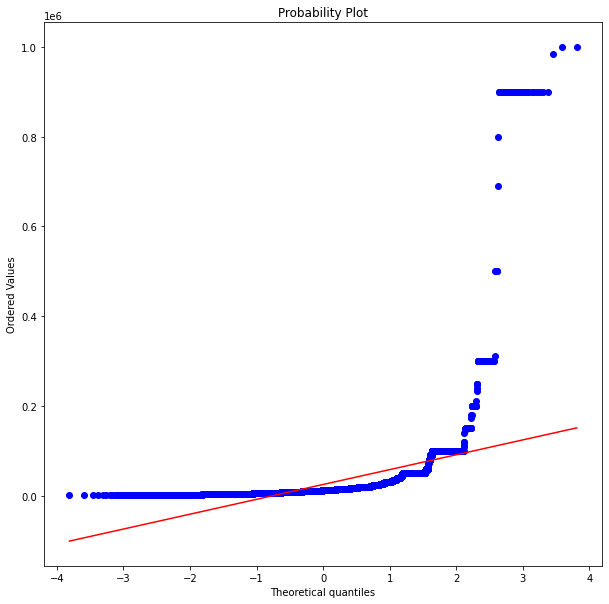

In [169]:
from scipy import stats

fig, axes = plt.subplots(1,1,figsize=(10,10))

stats.probplot(y, plot=axes)

In [170]:
y.describe()

count    9.990000e+03
mean     2.510464e+04
std      6.704985e+04
min      9.210000e+02
25%      6.960750e+03
50%      1.189250e+04
75%      2.008500e+04
max      1.000103e+06
Name: y, dtype: float64

In [171]:
# yの値を対数変換してみる
y_log = np.log1p(y)
y_log

0        9.393412
1        8.805075
2        9.202711
3        9.000853
4       11.516828
          ...    
9985     9.510889
9986     8.095599
9987     9.609049
9988     8.281724
9989    10.715351
Name: y, Length: 9990, dtype: float64

In [172]:
#ランダムフォレストモデルの学習
#標準化
scaler = StandardScaler()
scaler.fit(df_train)
train_scaled = scaler.transform(df_train)

#訓練データの分割
X_train, X_test, y_train, y_test = train_test_split(train_scaled, y_log, test_size=0.2, random_state=100)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

m_pred = rf.predict(X_test)

In [173]:
#ランダムフォレスト回帰の対数平均平方二乗誤差 (RMSLE)の評価
rmsle = np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=m_pred))
print(rmsle)

0.05677496447916764


In [174]:
#testデータでsubmitまで行う
scaler = StandardScaler()
scaler.fit(df_test)
T_scaled = scaler.transform(df_test)

T_pred = np.exp(rf.predict(T_scaled))

In [175]:
T_id = test_ids['id']
target = pd.DataFrame({'y':T_pred})
df_model = pd.concat([T_id, target], axis=1)
df_model.to_csv('submission.csv', index=False)

In [529]:
#lightgbmモデルの学習
scores = []
aucs = []
pred_lgbs = []
kf = KFold(n_splits=4, shuffle=True, random_state=0)
for tr_idx, va_idx in kf.split(df_train):
    tr_x, va_x = df_train.iloc[tr_idx], df_train.iloc[va_idx]
    tr_y, va_y = y_log.iloc[tr_idx], y_log.iloc[va_idx]
    
    lgb_train = lgb.Dataset(tr_x, tr_y)
    lgb_eval = lgb.Dataset(va_x, va_y)
    
    params = {'objective': 'rmse', 'seed': 0, 'verbose': -1, 'metrics': 'rmse', 'early_stopping':5000}
    num_round = 10000
    
    model = lgb.train(params, lgb_train, num_boost_round=num_round,
                      valid_names=['train','valid'], valid_sets=[lgb_train, lgb_eval])
    va_pred = model.predict(va_x)
    rmsle = np.sqrt(mean_squared_log_error(y_true=va_y, y_pred=va_pred))
    print(f'rmsle: {rmsle:.4f}')
    pred_lgb = model.predict(df_test)
    pred_lgbs.append(pred_lgb)

[1]	train's rmse: 0.946021	valid's rmse: 0.952009
Training until validation scores don't improve for 5000 rounds
[2]	train's rmse: 0.918472	valid's rmse: 0.928619
[3]	train's rmse: 0.89539	valid's rmse: 0.908976
[4]	train's rmse: 0.875774	valid's rmse: 0.891636
[5]	train's rmse: 0.857601	valid's rmse: 0.875491
[6]	train's rmse: 0.842169	valid's rmse: 0.862626
[7]	train's rmse: 0.827873	valid's rmse: 0.849681
[8]	train's rmse: 0.815654	valid's rmse: 0.84006
[9]	train's rmse: 0.805303	valid's rmse: 0.831106
[10]	train's rmse: 0.795049	valid's rmse: 0.823071
[11]	train's rmse: 0.785596	valid's rmse: 0.81559
[12]	train's rmse: 0.777129	valid's rmse: 0.809809
[13]	train's rmse: 0.771088	valid's rmse: 0.805141
[14]	train's rmse: 0.764946	valid's rmse: 0.799851
[15]	train's rmse: 0.757958	valid's rmse: 0.794579
[16]	train's rmse: 0.751887	valid's rmse: 0.791035
[17]	train's rmse: 0.746808	valid's rmse: 0.786648
[18]	train's rmse: 0.742248	valid's rmse: 0.782893
[19]	train's rmse: 0.736864	val

In [530]:
pred_lgbs

[array([9.75087986, 8.87459915, 9.48975599, ..., 9.46749677, 8.37648323,
        9.22162412]),
 array([9.57094586, 9.58256915, 9.61163318, ..., 9.44157607, 8.23804887,
        9.1088815 ]),
 array([9.85253836, 9.55186738, 9.28864766, ..., 9.58197016, 8.15356986,
        9.71278934]),
 array([9.21997316, 9.46475912, 9.50824071, ..., 9.50931472, 8.28353799,
        9.10442818])]

In [531]:
#lightgbmのバリデーションの回数(4回)におけるテストデータ予測値を平均
lgb_prediction = pd.DataFrame()
for i, pred in enumerate(pred_lgbs):
    lgb_prediction['pred_'+str(i)] = pred

In [532]:
#lightgbmのバリデーションの回数(4回)におけるテストデータ予測値を平均
mean_pred_lgb = pd.DataFrame()
for i in tqdm.tqdm(range(0, lgb_prediction.shape[0])):
    mean_pred_lgb.loc[i,'y'] = lgb_prediction.loc[i, :].mean()

100%|██████████| 4996/4996 [00:02<00:00, 1762.02it/s]


In [533]:
T_id = test_ids['id']
lgb_pred = np.exp(mean_pred_lgb)
df_model = pd.concat([T_id, lgb_pred], axis=1)
df_model.to_csv('submission.csv', index=False)

- 予測対象(料金)の対数変換によりスコア改善
- しかし、randomforestとlightgbm(勾配ブｰスティング選択、繰り返し5000回)の差は見られなかった
- 次に行うのは、
- minimum_nightsに対してフラグ付け(1-3：short, 4-7:week, 8-14:2week, 15-31:month, 32~:and_more),列に追加→理由は顧客の利用意図を分割するため
- データのクラスタリング(23個)→理由は23区の情報のためエリア情報的なものを追加したい考え。trainとtestで共通にしたいため、駅名データのみで作成するか？
- 名前データからの情報抽出(new,open,saleなど)し、フラグ付け→理由はnameから抽出できる数値以外の情報を抽出したいため
- 日付情報の復活(年月日を分割して列に追加)

In [176]:
df_train.head()

latitude_x  longitude_x  minimum_nights  number_of_reviews  \
0    35.68185    139.80310               1                 55   
1    35.72063    139.78536               6                 72   
2    35.74723    139.82349               1                 18   
3    35.68456    139.68077               1                  2   
4    35.69840    139.70467               1                 86   

   reviews_per_month  availability_365  longitude_y  latitude_y   st_dist  \
0               2.21               173   139.798851   35.682105  0.384816   
1               2.11                 9   139.783924   35.719862  0.155237   
2               3.46               288   139.827545   35.747649  0.368901   
3               1.76                87   139.684304   35.689798  0.664157   
4               2.00               156   139.707571   35.698418  0.261971   

   diffday_from_May1  neighbourhood_Adachi Ku  neighbourhood_Arakawa Ku  \
0                 -6                        0                         0   
1                -37                        0                         0   
2                -39                        0                         0   
3                -29                        0                         0   
4                -92                        0                         0   

   neighbourhood_Bunkyo Ku  neighbourhood_Chiyoda Ku  neighbourhood_Chuo Ku  \
0                        0                         0                      0   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         0                      0   
4                        0                         0                      0   

   neighbourhood_Edogawa Ku  neighbourhood_Itabashi Ku  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   neighbourhood_Katsushika Ku  neighbourhood_Kita Ku  neighbourhood_Koto Ku  \
0                            0                      0                      1   
1                            0                      0                      0   
2                            1                      0                      0   
3                            0                      0                      0   
4                            0                      0                      0   

   neighbourhood_Meguro Ku  neighbourhood_Minato Ku  neighbourhood_Nakano Ku  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   neighbourhood_Nerima Ku  neighbourhood_Ota Ku  neighbourhood_Setagaya Ku  \
0                        0                     0                          0   
1                        0                     0                          0   
2                        0                     0                          0   
3                        0                     0                          0   
4                        0                     0                          0   

   neighbourhood_Shibuya Ku  neighbourhood_Shinagawa Ku  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         1                           0   
4                         0                           0   

   neighbourhood_Shinjuku Ku  neighbourhood_Suginami Ku  \
0                      

In [197]:
#ベースラインデータのコピー
sel_train = df_train.copy()
sel_test = df_test.copy()

In [198]:
sel_train.loc[0, 'minimum_nights']

1

In [199]:
#trainデータ
for i in range(len(sel_train)):
    p = sel_train.loc[i, 'minimum_nights']
    if 1 <= p and p <= 3:
        sel_train.loc[i, 'short'] = 1
    elif 4 <= p and p <= 7:
        sel_train.loc[i, 'weekly'] = 1
    elif 8 <= p and p <= 14:
        sel_train.loc[i, '2weekly'] = 1
    elif 15 <= p and p <= 31:
        sel_train.loc[i, 'monthly'] = 1
    elif 32 <= p:
        sel_train.loc[i, 'and_more'] = 1
sel_train = sel_train.fillna(0)

In [200]:
sel_train.head()

latitude_x  longitude_x  minimum_nights  number_of_reviews  \
0    35.68185    139.80310               1                 55   
1    35.72063    139.78536               6                 72   
2    35.74723    139.82349               1                 18   
3    35.68456    139.68077               1                  2   
4    35.69840    139.70467               1                 86   

   reviews_per_month  availability_365  longitude_y  latitude_y   st_dist  \
0               2.21               173   139.798851   35.682105  0.384816   
1               2.11                 9   139.783924   35.719862  0.155237   
2               3.46               288   139.827545   35.747649  0.368901   
3               1.76                87   139.684304   35.689798  0.664157   
4               2.00               156   139.707571   35.698418  0.261971   

   diffday_from_May1  neighbourhood_Adachi Ku  neighbourhood_Arakawa Ku  \
0                 -6                        0                         0   
1                -37                        0                         0   
2                -39                        0                         0   
3                -29                        0                         0   
4                -92                        0                         0   

   neighbourhood_Bunkyo Ku  neighbourhood_Chiyoda Ku  neighbourhood_Chuo Ku  \
0                        0                         0                      0   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         0                      0   
4                        0                         0                      0   

   neighbourhood_Edogawa Ku  neighbourhood_Itabashi Ku  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   neighbourhood_Katsushika Ku  neighbourhood_Kita Ku  neighbourhood_Koto Ku  \
0                            0                      0                      1   
1                            0                      0                      0   
2                            1                      0                      0   
3                            0                      0                      0   
4                            0                      0                      0   

   neighbourhood_Meguro Ku  neighbourhood_Minato Ku  neighbourhood_Nakano Ku  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   neighbourhood_Nerima Ku  neighbourhood_Ota Ku  neighbourhood_Setagaya Ku  \
0                        0                     0                          0   
1                        0                     0                          0   
2                        0                     0                          0   
3                        0                     0                          0   
4                        0                     0                          0   

   neighbourhood_Shibuya Ku  neighbourhood_Shinagawa Ku  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         1                           0   
4                         0                           0   

   neighbourhood_Shinjuku Ku  neighbourhood_Suginami Ku  \
0                      

In [202]:
#testデータ
for i in range(len(sel_test)):
    p = sel_test.loc[i, 'minimum_nights']
    if 1 <= p and p <= 3:
        sel_test.loc[i, 'short'] = 1
    elif 4 <= p and p <= 7:
        sel_test.loc[i, 'weekly'] = 1
    elif 8 <= p and p <= 14:
        sel_test.loc[i, '2weekly'] = 1
    elif 15 <= p and p <= 31:
        sel_test.loc[i, 'monthly'] = 1
    elif 32 <= p:
        sel_test.loc[i, 'and_more'] = 1
sel_test = sel_test.fillna(0)

In [203]:
sel_test.head()

latitude_x  longitude_x  minimum_nights  number_of_reviews  \
0    35.67131    139.73285               1                  0   
1    35.73014    139.71739               2                 21   
2    35.66193    139.66540               1                 14   
3    35.73603    139.74794               1                 16   
4    35.72126    139.78320              30                  2   

   reviews_per_month  availability_365  longitude_y  latitude_y   st_dist  \
0               0.00               183   139.738348   35.673230  0.540584   
1               1.94               337   139.719546   35.725732  0.527371   
2               0.82               240   139.667213   35.661597  0.167925   
3               1.19                 0   139.747248   35.736892  0.114429   
4               0.19               164   139.783924   35.719862  0.168632   

   diffday_from_May1  neighbourhood_Adachi Ku  neighbourhood_Arakawa Ku  \
0                  0                        0                         0   
1                -15                        0                         0   
2                -79                        0                         0   
3                -74                        0                         0   
4               -285                        0                         0   

   neighbourhood_Bunkyo Ku  neighbourhood_Chiyoda Ku  neighbourhood_Chuo Ku  \
0                        0                         0                      0   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         0                      0   
4                        0                         0                      0   

   neighbourhood_Edogawa Ku  neighbourhood_Itabashi Ku  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   neighbourhood_Katsushika Ku  neighbourhood_Kita Ku  neighbourhood_Koto Ku  \
0                            0                      0                      0   
1                            0                      0                      0   
2                            0                      0                      0   
3                            0                      0                      0   
4                            0                      0                      0   

   neighbourhood_Meguro Ku  neighbourhood_Minato Ku  neighbourhood_Nakano Ku  \
0                        0                        1                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   neighbourhood_Nerima Ku  neighbourhood_Ota Ku  neighbourhood_Setagaya Ku  \
0                        0                     0                          0   
1                        0                     0                          0   
2                        0                     0                          1   
3                        0                     0                          0   
4                        0                     0                          0   

   neighbourhood_Shibuya Ku  neighbourhood_Shinagawa Ku  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   neighbourhood_Shinjuku Ku  neighbourhood_Suginami Ku  \
0                      

In [204]:
sing_tmp

station_name   longitude   latitude
0              御成門  139.751535  35.661215
1              後楽園  139.751864  35.707898
2              桜田門  139.751490  35.677405
3              霞ケ関  139.750899  35.673838
4              昭和島  139.749918  35.570656
..             ...         ...        ...
574            八幡山  139.614927  35.669982
575            高井戸  139.615115  35.683253
576            上北沢  139.623290  35.668857
577            下井草  139.624688  35.723852
578  東京国際クルーズターミナル  139.773157  35.621462

[579 rows x 3 columns]

In [205]:
st_mean

station_name   longitude   latitude
0            池袋  139.710321  35.730268
1            渋谷  139.701535  35.658840
2            新宿  139.699750  35.690473
3           大手町  139.764550  35.685847
4           北千住  139.804951  35.749493
5            浅草  139.796291  35.711473
6           飯田橋  139.744949  35.702105
7            新橋  139.759028  35.666177
8           日比谷  139.759633  35.674956
9           五反田  139.724057  35.626113
10          市ケ谷  139.736074  35.691787
11          四ツ谷  139.730047  35.685553
12          南千住  139.799152  35.733281
13        新宿三丁目  139.705331  35.690772
14          秋葉原  139.774340  35.698557
15           中井  139.686662  35.714571
16          錦糸町  139.814538  35.697190
17          東中野  139.683712  35.706710
18          浅草橋  139.785366  35.697427
19           練馬  139.654569  35.737648
20          新木場  139.826828  35.646002
21        青山一丁目  139.724060  35.672847
22        本郷三丁目  139.760005  35.707066
23           中延  139.713131  35.605739
24           目黒  139.715638  35.633598
25          下北沢  139.667213  35.661597
26           荻窪  139.620113  35.704414
27           王子  139.737854  35.753252
28           巣鴨  139.738911  35.733474
29           品川  139.738544  35.628522
30          代々木  139.701854  35.683139
31         高田馬場  139.704230  35.713008
32         中野坂上  139.682594  35.697505
33           亀戸  139.826526  35.697526
34          国分寺  139.480194  35.700480
35         麻布十番  139.736583  35.655592
36           豊洲  139.795812  35.654350
37           両国  139.795378  35.696336
38         御茶ノ水  139.764454  35.700109
39         西日暮里  139.766684  35.732106
40          吉祥寺  139.580036  35.702705
41           町屋  139.781000  35.742543
42           上野  139.777083  35.712636
43           神田  139.770770  35.692380
44           東京  139.765405  35.681572
45           汐留  139.760313  35.663287
46         玉川上水  139.418150  35.731991
47         高幡不動  139.414068  35.661920
48           駒込  139.747248  35.736892
49          豊島園  139.648545  35.742061
50          八丁堀  139.777344  35.674734
51           蒲田  139.715329  35.562142
52           町田  139.445407  35.543113
53           高尾  139.281920  35.641835
54          大井町  139.734938  35.606896
55       天王洲アイル  139.750734  35.621735
56          恵比寿  139.709529  35.647008
57          早稲田  139.720123  35.708786
58          六本木  139.731505  35.663379
59    明治神宮前〈原宿〉  139.704681  35.668784
60          神保町  139.757863  35.695729
61       多摩動物公園  139.404150  35.648940
62          浜松町  139.756941  35.655529
63  羽田空港第3ターミナル  139.768587  35.544422
64          東新宿  139.707571  35.698418
65          水道橋  139.754736  35.702719
66          三越前  139.773370  35.686004
67          日本橋  139.774619  35.681883
68          有楽町  139.763535  35.675578
69          熊野前  139.769450  35.749092

In [206]:
len(sing_tmp), len(st_mean)

(579, 70)

In [208]:
len(station)

746

In [209]:
mean_station = pd.concat([st_mean, sing_tmp])

In [210]:
mean_station

station_name   longitude   latitude
0               池袋  139.710321  35.730268
1               渋谷  139.701535  35.658840
2               新宿  139.699750  35.690473
3              大手町  139.764550  35.685847
4              北千住  139.804951  35.749493
..             ...         ...        ...
574            八幡山  139.614927  35.669982
575            高井戸  139.615115  35.683253
576            上北沢  139.623290  35.668857
577            下井草  139.624688  35.723852
578  東京国際クルーズターミナル  139.773157  35.621462

[649 rows x 3 columns]

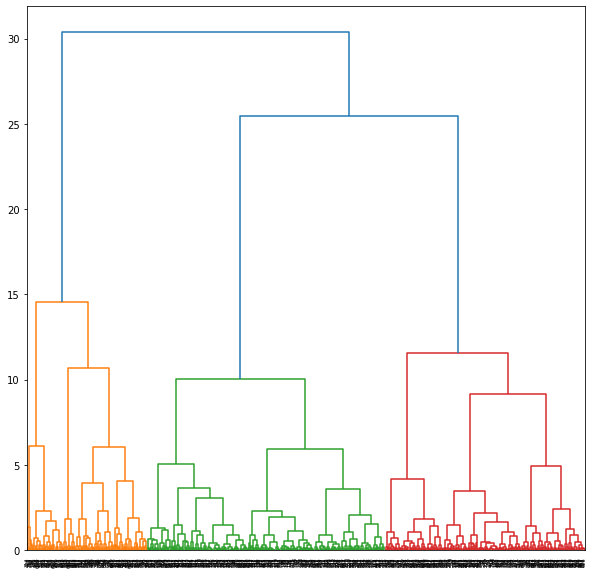

In [216]:
#凝集的階層型クラスタリングを試す
#23分割が良いのかどうか
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

fig, axes = plt.subplots(1,1,figsize=(10,10))

scaler = StandardScaler()
scaler.fit(mean_station[['longitude','latitude']])
X_scaled = scaler.transform(mean_station[['longitude','latitude']])
result = linkage(X_scaled, method='ward')
dend = dendrogram(result, ax=axes)


- デンドログラムより、クラスタ数8つで分割するのがいいか

In [219]:
# 階層的クラスタリングを、クラスタ数8で行う
#ユークリッド距離をward法によって分割
from sklearn.cluster import AgglomerativeClustering

clust = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage = 'ward')
pr_clust = clust.fit_predict(mean_station[['longitude','latitude']])

In [221]:
mean_station['station_cluster'] =  pr_clust

In [222]:
mean_station

station_name   longitude   latitude  station_cluster
0               池袋  139.710321  35.730268                2
1               渋谷  139.701535  35.658840                6
2               新宿  139.699750  35.690473                2
3              大手町  139.764550  35.685847                7
4              北千住  139.804951  35.749493                0
..             ...         ...        ...              ...
574            八幡山  139.614927  35.669982                6
575            高井戸  139.615115  35.683253                6
576            上北沢  139.623290  35.668857                6
577            下井草  139.624688  35.723852                6
578  東京国際クルーズターミナル  139.773157  35.621462                7

[649 rows x 4 columns]

In [231]:
mean_station.reset_index(drop='index', inplace=True)

In [237]:
#訓練データのクラスタリング
for i in range(len(sel_train)):
    sn_x = n_train.loc[i, 'station_name']
    for s, n in enumerate(mean_station['station_name']):
        if sn_x == n:
            sel_train.loc[i, 'area_cluster'] = mean_station.loc[s, 'station_cluster']

In [238]:
sel_train

latitude_x  longitude_x  minimum_nights  number_of_reviews  \
0       35.68185    139.80310               1                 55   
1       35.72063    139.78536               6                 72   
2       35.74723    139.82349               1                 18   
3       35.68456    139.68077               1                  2   
4       35.69840    139.70467               1                 86   
...          ...          ...             ...                ...   
9985    35.69728    139.70321               1                  1   
9986    35.70407    139.79180               1                  0   
9987    35.71501    139.79417               1                  5   
9988    35.74672    139.82925               1                  1   
9989    35.71499    139.82284               1                 16   

      reviews_per_month  availability_365  longitude_y  latitude_y   st_dist  \
0                  2.21               173   139.798851   35.682105  0.384816   
1                  2.11                 9   139.783924   35.719862  0.155237   
2                  3.46               288   139.827545   35.747649  0.368901   
3                  1.76                87   139.684304   35.689798  0.664157   
4                  2.00               156   139.707571   35.698418  0.261971   
...                 ...               ...          ...         ...       ...   
9985               0.21               357   139.700000   35.696254  0.311516   
9986               0.00               153   139.790931   35.703236  0.121479   
9987               0.22               156   139.796291   35.711473  0.437398   
9988               0.25                 0   139.827545   35.747649  0.185329   
9989               0.39               161   139.820012   35.718441  0.460908   

      diffday_from_May1  neighbourhood_Adachi Ku  neighbourhood_Arakawa Ku  \
0                    -6                        0                         0   
1                   -37                        0                         0   
2                   -39                        0                         0   
3                   -29                        0                         0   
4                   -92                        0                         0   
...                 ...                      ...                       ...   
9985               -144                        0                         0   
9986                  0                        0                         0   
9987               -143                        0                         0   
9988               -121                        0                         0   
9989               -592                        0                         0   

      neighbourhood_Bunkyo Ku  neighbourhood_Chiyoda Ku  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   
...                       ...                       ...   
9985                        0                         0   
9986                        0                         0   
9987                        0                         0   
9988                        0                         0   
9989                        0                         0   

      neighbourhood_Chuo Ku  neighbourhood_Edogawa Ku  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   
...                     ...                       ...   
9985                      0                         0   
9986                      0                         0   
9987                      0                         0   
9988        

In [241]:
#testデータのクラスタリング
for i in range(len(sel_test)):
    sn_x = n_test.loc[i, 'station_name']
    for s, n in enumerate(mean_station['station_name']):
        if sn_x == n:
            sel_test.loc[i, 'area_cluster'] = mean_station.loc[s, 'station_cluster']

In [242]:
sel_test.head()

latitude_x  longitude_x  minimum_nights  number_of_reviews  \
0    35.67131    139.73285               1                  0   
1    35.73014    139.71739               2                 21   
2    35.66193    139.66540               1                 14   
3    35.73603    139.74794               1                 16   
4    35.72126    139.78320              30                  2   

   reviews_per_month  availability_365  longitude_y  latitude_y   st_dist  \
0               0.00               183   139.738348   35.673230  0.540584   
1               1.94               337   139.719546   35.725732  0.527371   
2               0.82               240   139.667213   35.661597  0.167925   
3               1.19                 0   139.747248   35.736892  0.114429   
4               0.19               164   139.783924   35.719862  0.168632   

   diffday_from_May1  neighbourhood_Adachi Ku  neighbourhood_Arakawa Ku  \
0                  0                        0                         0   
1                -15                        0                         0   
2                -79                        0                         0   
3                -74                        0                         0   
4               -285                        0                         0   

   neighbourhood_Bunkyo Ku  neighbourhood_Chiyoda Ku  neighbourhood_Chuo Ku  \
0                        0                         0                      0   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         0                      0   
4                        0                         0                      0   

   neighbourhood_Edogawa Ku  neighbourhood_Itabashi Ku  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   neighbourhood_Katsushika Ku  neighbourhood_Kita Ku  neighbourhood_Koto Ku  \
0                            0                      0                      0   
1                            0                      0                      0   
2                            0                      0                      0   
3                            0                      0                      0   
4                            0                      0                      0   

   neighbourhood_Meguro Ku  neighbourhood_Minato Ku  neighbourhood_Nakano Ku  \
0                        0                        1                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   neighbourhood_Nerima Ku  neighbourhood_Ota Ku  neighbourhood_Setagaya Ku  \
0                        0                     0                          0   
1                        0                     0                          0   
2                        0                     0                          1   
3                        0                     0                          0   
4                        0                     0                          0   

   neighbourhood_Shibuya Ku  neighbourhood_Shinagawa Ku  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         0                           0   
4                         0                           0   

   neighbourhood_Shinjuku Ku  neighbourhood_Suginami Ku  \
0                      

In [261]:
#trainデータでnameにnewなどの情報あるものは1
search_n = tr_name.str.contains('new|NEW|New|open|Open|OPEN|sale|Sale|SALE')
for i, e in enumerate(search_n):
    if e == True:
        sel_train.loc[i, 'info_new'] = 1
sel_train = sel_train.fillna(0)


In [262]:
sel_train.head()

latitude_x  longitude_x  minimum_nights  number_of_reviews  \
0    35.68185    139.80310               1                 55   
1    35.72063    139.78536               6                 72   
2    35.74723    139.82349               1                 18   
3    35.68456    139.68077               1                  2   
4    35.69840    139.70467               1                 86   

   reviews_per_month  availability_365  longitude_y  latitude_y   st_dist  \
0               2.21               173   139.798851   35.682105  0.384816   
1               2.11                 9   139.783924   35.719862  0.155237   
2               3.46               288   139.827545   35.747649  0.368901   
3               1.76                87   139.684304   35.689798  0.664157   
4               2.00               156   139.707571   35.698418  0.261971   

   diffday_from_May1  neighbourhood_Adachi Ku  neighbourhood_Arakawa Ku  \
0                 -6                        0                         0   
1                -37                        0                         0   
2                -39                        0                         0   
3                -29                        0                         0   
4                -92                        0                         0   

   neighbourhood_Bunkyo Ku  neighbourhood_Chiyoda Ku  neighbourhood_Chuo Ku  \
0                        0                         0                      0   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         0                      0   
4                        0                         0                      0   

   neighbourhood_Edogawa Ku  neighbourhood_Itabashi Ku  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   neighbourhood_Katsushika Ku  neighbourhood_Kita Ku  neighbourhood_Koto Ku  \
0                            0                      0                      1   
1                            0                      0                      0   
2                            1                      0                      0   
3                            0                      0                      0   
4                            0                      0                      0   

   neighbourhood_Meguro Ku  neighbourhood_Minato Ku  neighbourhood_Nakano Ku  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   neighbourhood_Nerima Ku  neighbourhood_Ota Ku  neighbourhood_Setagaya Ku  \
0                        0                     0                          0   
1                        0                     0                          0   
2                        0                     0                          0   
3                        0                     0                          0   
4                        0                     0                          0   

   neighbourhood_Shibuya Ku  neighbourhood_Shinagawa Ku  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         1                           0   
4                         0                           0   

   neighbourhood_Shinjuku Ku  neighbourhood_Suginami Ku  \
0                      

In [263]:
#testデータでnameにnewなどの情報あるものは1
search_s = ts_name.str.contains('new|NEW|New|open|Open|OPEN|sale|Sale|SALE')
for i, e in enumerate(search_s):
    if e == True:
        sel_test.loc[i, 'info_new'] = 1
sel_test = sel_test.fillna(0)


In [268]:
sel_train.shape, sel_test.shape

((9990, 476), (4996, 476))

- 以下を行いランダムフォレストで学習
- minimum_nightsに対してフラグ付け(1-3：short, 4-7:week, 8-14:2week, 15-31:month, 32~:and_more),列に追加→理由は顧客の利用意図を分割するため
- データのクラスタリング(23個)→理由は23区の情報のためエリア情報的なものを追加したい考え。trainとtestで共通にしたいため、駅名データのみで作成するか？
- 名前データからの情報抽出(new,open,saleなど)し、フラグ付け→理由はnameから抽出できる数値以外の情報を抽出したいため
- 日付情報の復活(年月日を分割して列に追加)
- すべて追加したモデルはスコア悪化

- 追加した特徴量のそれぞれで効果を確かめる
- ベースラインモデルのrmsle:train 0.05677496447916764
- 滞在日数フラグのみは悪化
- 駅名クラスタリングのみも悪化
- newなどの情報を足したものも悪化
- 駅の座標longitude_yなど削除しても悪化
- 日付を単純に分割しただけでは精度変わらず
- 日付をunix時間にしたものを追加しても改善せず
- 日付をunix時間にして2020年5月1日からの差を算出して足しても改善せず
- カテゴリ変数のlabelencodingを行っても改善せず
- hostidを追加したら改善

In [296]:
#追加した特徴量を別データフレームに格納
train_stay_days = sel_train[['short','weekly','monthly','2weekly','and_more']]
train_area_cluster = sel_train['area_cluster']
train_info_new = sel_train['info_new']

test_stay_days = sel_test[['short','weekly','monthly','2weekly','and_more']]
test_area_cluster = sel_test['area_cluster']
test_info_new = sel_test['info_new']

In [497]:
#ベースラインデータのコピー
ch_train = df_train.copy()
ch_test = df_test.copy()

In [499]:
#hostidの追加
ch_train['host_id'] = np.log(train['host_id'])
ch_test['host_id'] = np.log(test['host_id'])

In [500]:
ch_train.head()

latitude_x  longitude_x  minimum_nights  number_of_reviews  \
0    35.68185    139.80310               1                 55   
1    35.72063    139.78536               6                 72   
2    35.74723    139.82349               1                 18   
3    35.68456    139.68077               1                  2   
4    35.69840    139.70467               1                 86   

   reviews_per_month  availability_365  longitude_y  latitude_y   st_dist  \
0               2.21               173   139.798851   35.682105  0.384816   
1               2.11                 9   139.783924   35.719862  0.155237   
2               3.46               288   139.827545   35.747649  0.368901   
3               1.76                87   139.684304   35.689798  0.664157   
4               2.00               156   139.707571   35.698418  0.261971   

   diffday_from_May1  neighbourhood_Adachi Ku  neighbourhood_Arakawa Ku  \
0                 -6                        0                         0   
1                -37                        0                         0   
2                -39                        0                         0   
3                -29                        0                         0   
4                -92                        0                         0   

   neighbourhood_Bunkyo Ku  neighbourhood_Chiyoda Ku  neighbourhood_Chuo Ku  \
0                        0                         0                      0   
1                        0                         0                      0   
2                        0                         0                      0   
3                        0                         0                      0   
4                        0                         0                      0   

   neighbourhood_Edogawa Ku  neighbourhood_Itabashi Ku  \
0                         0                          0   
1                         0                          0   
2                         0                          0   
3                         0                          0   
4                         0                          0   

   neighbourhood_Katsushika Ku  neighbourhood_Kita Ku  neighbourhood_Koto Ku  \
0                            0                      0                      1   
1                            0                      0                      0   
2                            1                      0                      0   
3                            0                      0                      0   
4                            0                      0                      0   

   neighbourhood_Meguro Ku  neighbourhood_Minato Ku  neighbourhood_Nakano Ku  \
0                        0                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        0                        0                        0   
4                        0                        0                        0   

   neighbourhood_Nerima Ku  neighbourhood_Ota Ku  neighbourhood_Setagaya Ku  \
0                        0                     0                          0   
1                        0                     0                          0   
2                        0                     0                          0   
3                        0                     0                          0   
4                        0                     0                          0   

   neighbourhood_Shibuya Ku  neighbourhood_Shinagawa Ku  \
0                         0                           0   
1                         0                           0   
2                         0                           0   
3                         1                           0   
4                         0                           0   

   neighbourhood_Shinjuku Ku  neighbourhood_Suginami Ku  \
0                      

In [487]:
# #ラベルエンコーディングを行う
# #データの結合
# merge_df = pd.concat([ch_train, ch_test], axis=0)

In [488]:
# #ラベルエンコーディングを行う
# from sklearn.preprocessing import LabelEncoder

# cols = ['station_name', 'room_type']
# for c in cols:
#     le = LabelEncoder()
#     le.fit(merge_df[c])
    
#     merge_df[c] = le.transform(merge_df[c])


In [501]:
#ランダムフォレストモデルの学習
#標準化
scaler = StandardScaler()
scaler.fit(ch_train)
train_scaled = scaler.transform(ch_train)

#訓練データの分割
X_train, X_test, y_train, y_test = train_test_split(train_scaled, y_log, test_size=0.2, random_state=100)

rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train, y_train)

m_pred = rf.predict(X_test)

In [502]:
#ランダムフォレスト回帰の対数平均平方二乗誤差 (RMSLE)の評価
rmsle = np.sqrt(mean_squared_log_error(y_true=y_test, y_pred=m_pred))
print(rmsle)

0.05168403080617431


In [503]:
#testデータでsubmitまで行う
scaler = StandardScaler()
scaler.fit(ch_test)
T_scaled = scaler.transform(ch_test)

T_pred = np.exp(rf.predict(T_scaled))

In [505]:
T_id = test_ids['id']
target = pd.DataFrame({'y':T_pred})
df_model = pd.concat([T_id, target], axis=1)
df_model.to_csv('submission.csv', index=False)